In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib
plt.rcParams.update(plt.rcParamsDefault)
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'

#Direct input
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.titlesize":10
}
plt.rcParams.update(tex_fonts)

# font is  \OT1/cmr/m/n/10.95
#matplotlib.rcParams['font.serif'] = ['Courier']

# textwidth in latex in inches
TEXTWIDTH = 5.7885

plt.rcParams['xtick.major.pad']='1.5'
plt.rcParams['ytick.major.pad']='1'

In [2]:
def compute_mean_std(y_data):
    """
    Plots the average over all ys as bold line and standart deviation as shaded area
    Each entry in y_array list will become one line
    :param y_data: data to take mean and std of
    """
    mean = np.mean(y_data, axis=0)
    std = np.std(y_data, axis=0)

    return mean, std


In [3]:
def gather_data(path, x, idx):
    """
    Gather data, to the corresponding x-data until idx
    """
    y_data_returns = np.zeros((len(path), x.shape[0]))
    y_data_succ = np.zeros((len(path), x.shape[0]))

    for i in range(len(path)):
        data = np.load(path[i], mmap_mode='r')
        #for k in data.keys():
        #    print(f" key = {k}\n {data[k]}")

        # take mean over 10 eval episodes of one run
        returns = data["results"][idx]
        success_rate = data["successes"][idx]
        #ep_lengths = data["ep_lengths"][idx]
        #success_rate = returns.copy()
        #success_rate[np.where(returns > 0)] = 1
        #success_rate[np.where(returns < 0)] = -1

        mean_return = np.sum(returns, axis=1) / data["results"].shape[1] # average over number of eval episodes
        success_rate = np.sum(success_rate, axis=1) / data["successes"].shape[1] # average over number of eval episodes

        # gather values of different runs
        y_data_returns[i] = mean_return
        y_data_succ[i] = success_rate

    return y_data_returns, y_data_succ


In [4]:
def get_parallel_succ(data, x, idx):
    """
    Gather data, to the corresponding x-data until idx
    """
    y_data_succ = np.zeros((len(data), x.shape[0]))

    for i in range(len(data)):
        y_data_succ[i] = (np.load(data[i], mmap_mode='r')["one_step_solving_rate"].flatten())[idx]

    mean = np.mean(y_data_succ, axis=0)
    std = np.std(y_data_succ, axis=0)

    return mean, std

In [5]:
path = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed195738/evaluations.npz"]

data = np.load(path[0], mmap_mode='r')

for k in data.keys():
    print(k)
    print(data[k])

timesteps
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000 310000 315000 320000 325000 330000 335000 340000 345000 350000
 355000 360000 365000 370000 375000 380000 385000 390000 395000 400000
 405000 410000 415000 420000 425000 430000 435000 440000 445000 450000
 455000 460000 465000 470000 475000 480000 485000 490000 495000 500000
 505000 510000 515000 520000 525000 530000 535000 540000 545000 550000
 555000 560000 565000 570000 575000 580000 585000 590000 595000 600000
 605000 610000 615000]
results
[]
ep_lengths
[]
one_step_solving_rate
[[0.  ]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.

# **Comparison of parallel training**

## **Too many skills**

In [6]:
seads_20skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/20-skills/parallelseads_2x2-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/20-skills/parallelseads_2x2-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/20-skills/parallelseads_2x2-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/20-skills/parallelseads_2x2-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/20-skills/parallelseads_2x2-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

mine_20skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/parallel2x2-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/parallel2x2-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/parallel2x2-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/parallel2x2-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/parallel2x2-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/15-skills/parallelseads_2x2-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/15-skills/parallelseads_2x2-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/15-skills/parallelseads_2x2-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/15-skills/parallelseads_2x2-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/15-skills/parallelseads_2x2-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz"]

mine_15skills = [#"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/parallel2x2-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed1105399/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/parallel2x2-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/parallel2x2-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/parallel2x2-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/parallel2x2-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_14skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/parallelseads_2x2-14skills_num_skills14_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz"]

mine_14skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-14skills_num_skills14_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz"]

seads_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/10-skills/parallelseads_2x2-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/10-skills/parallelseads_2x2-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/10-skills/parallelseads_2x2-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                  "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/10-skills/parallelseads_2x2-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]#,
                  #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/10-skills/parallelseads_2x2-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed937584/evaluations.npz"]

mine_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/parallel2x2-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_5skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/5-skills/parallelseads_2x2-5skills_num_skills5_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/5-skills/parallelseads_2x2-5skills_num_skills5_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/5-skills/parallelseads_2x2-5skills_num_skills5_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/5-skills/parallelseads_2x2-5skills_num_skills5_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]#,
                 #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/5-skills/parallelseads_2x2-5skills_num_skills5_relabelingFalse_noveltyTrue_seconbestTrue_seed937584/evaluations.npz"]

mine_5skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/5-skills/parallel2x2-5skills_num_skills5_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/5-skills/parallel2x2-5skills_num_skills5_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/5-skills/parallel2x2-5skills_num_skills5_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/5-skills/parallel2x2-5skills_num_skills5_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/5-skills/parallel2x2-5skills_num_skills5_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz"]

seads_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2-skills/parallelseads_2x2-2skills_num_skills2_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2-skills/parallelseads_2x2-2skills_num_skills2_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2-skills/parallelseads_2x2-2skills_num_skills2_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2-skills/parallelseads_2x2-2skills_num_skills2_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2-skills/parallelseads_2x2-2skills_num_skills2_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

mine_2skills = [#"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/parallel2x2-maxsampling-03-005_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/parallel2x2-maxsampling-03-005_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/parallel2x2-maxsampling-03-005_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/parallel2x2-maxsampling-03-005_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/parallel2x2-maxsampling-03-005_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [7]:
mine_15skills_noinit = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-init/parallel2x2-15skills-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-init/parallel2x2-15skills-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-init/parallel2x2-15skills-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-init/parallel2x2-15skills-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]#,
                        #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-init/parallel2x2-15skills-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed937584/evaluations.npz"]

mine_15skills_norefinement = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-refinement/parallel2x2-15skills-norefinement_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-refinement/parallel2x2-15skills-norefinement_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-refinement/parallel2x2-15skills-norefinement_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-refinement/parallel2x2-15skills-norefinement_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]#,
                              #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/no-refinement/parallel2x2-15skills-norefinement_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed937584/evaluations.npz"]

In [8]:

mine_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-3skills_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-3skills_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-3skills_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-3skills_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

mine_2x3_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-10skills_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-10skills_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-10skills_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-10skills_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-10skills_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [9]:
new_refine_2x3_0_03 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-0-03/parallel2x3-newchange-0-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                       "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-0-03/parallel2x3-newchange-0-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                       "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-0-03/parallel2x3-newchange-0-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                       "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-0-03/parallel2x3-newchange-0-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                       "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-0-03/parallel2x3-newchange-0-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_refine_2x3_03_03 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-03-03/parallel2x3-newchange-03-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-03-03/parallel2x3-newchange-03-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-03-03/parallel2x3-newchange-03-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-03-03/parallel2x3-newchange-03-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-03-03/parallel2x3-newchange-03-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_refine_2x3_05_03  = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-05-03/parallel2x3-newchange-05-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-05-03/parallel2x3-newchange-05-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-05-03/parallel2x3-newchange-05-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-05-03/parallel2x3-newchange-05-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/change-05-03/parallel2x3-newchange-05-03_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]


seads_new_eval_2x3_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/new-eval/10-skills/parallelseads_2x3-neweval-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/new-eval/10-skills/parallelseads_2x3-neweval-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/new-eval/10-skills/parallelseads_2x3-neweval-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/new-eval/10-skills/parallelseads_2x3-neweval-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/new-eval/10-skills/parallelseads_2x3-neweval-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

In [10]:
new_sample_03_025 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-03-025/parallel2x3-newsampling-03-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-03-025/parallel2x3-newsampling-03-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-03-025/parallel2x3-newsampling-03-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-03-025/parallel2x3-newsampling-03-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-03-025/parallel2x3-newsampling-03-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_sample_04_025 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-04-025/parallel2x3-newsampling-04-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-04-025/parallel2x3-newsampling-04-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-04-025/parallel2x3-newsampling-04-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-04-025/parallel2x3-newsampling-04-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-04-025/parallel2x3-newsampling-04-025_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_sample_05_01 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new-refinement/new-sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]


new_sample_05_01_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/new_sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/new_sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/new_sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/new_sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/new_sampling/change-05-01/parallel2x3-newsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

max_sample_05_01_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-01/parallel2x3-maxsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-01/parallel2x3-maxsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-01/parallel2x3-maxsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                             #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-01/parallel2x3-maxsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-01/parallel2x3-maxsampling-05-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [11]:
max_sample_03_0_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03--/parallel2x3-maxsampling-03_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03--/parallel2x3-maxsampling-03_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03--/parallel2x3-maxsampling-03_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03--/parallel2x3-maxsampling-03_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03--/parallel2x3-maxsampling-03_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]


max_sample_02_005_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-02-005/parallel2x3-maxsampling-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-02-005/parallel2x3-maxsampling-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-02-005/parallel2x3-maxsampling-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-02-005/parallel2x3-maxsampling-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-02-005/parallel2x3-maxsampling-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

max_sample_03_005_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]


max_sample_07_005_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-07-005/parallel2x3-maxsampling-07-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-07-005/parallel2x3-maxsampling-07-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-07-005/parallel2x3-maxsampling-07-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-07-005/parallel2x3-maxsampling-07-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-07-005/parallel2x3-maxsampling-07-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_2x3_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/15-skills/parallelseads_2x3-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/15-skills/parallelseads_2x3-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/15-skills/parallelseads_2x3-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/15-skills/parallelseads_2x3-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/15-skills/parallelseads_2x3-15skills_num_skills15_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

seads_2x3_20skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/20-skills/parallelseads_2x3-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/20-skills/parallelseads_2x3-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/20-skills/parallelseads_2x3-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/20-skills/parallelseads_2x3-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/20-skills/parallelseads_2x3-20skills_num_skills20_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]


max_sample_03_005_20skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/change-03-005/parallel2x3-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/change-03-005/parallel2x3-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/change-03-005/parallel2x3-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/change-03-005/parallel2x3-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/change-03-005/parallel2x3-maxsampling-03-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_2x3_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/10-skills/parallelseads_2x3-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/10-skills/parallelseads_2x3-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/10-skills/parallelseads_2x3-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/10-skills/parallelseads_2x3-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/10-skills/parallelseads_2x3-10skills_num_skills10_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

max_sample_03_005_10skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/parallel2x3-maxsampling-03-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

seads_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/3-skills/parallelseads_2x3-3skills_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/3-skills/parallelseads_2x3-3skills_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/3-skills/parallelseads_2x3-3skills_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/3-skills/parallelseads_2x3-3skills_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/SEADS/2x3/3-skills/parallelseads_2x3-3skills_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz"]

max_sample_03_005_3skills = [#"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-maxsampling-03-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-maxsampling-03-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-maxsampling-03-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-maxsampling-03-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/parallel2x3-maxsampling-03-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [12]:
#x_2x3 = np.load(seads_2x3_3skills[0], mmap_mode='r')["timesteps"]
#idx = np.where(x_2x3 <= 550000)
#x_2x3 = x_2x3[idx]
#
#mean_succ_seads_2x3_3, std_succ_seads_2x3_3 = get_parallel_succ(seads_2x3_3skills, x_2x3, idx)
#mean_succ_seads_2x3_10, std_succ_seads_2x3_10 = get_parallel_succ(seads_2x3_10skills, x_2x3, idx)
#
#mean_succ_2x3_3, std_succ_2x3_3 = get_parallel_succ(mine_2x3_3skills, x_2x3, idx)
#mean_succ_2x3_10, std_succ_2x3_10 = get_parallel_succ(mine_2x3_10skills, x_2x3, idx)

In [13]:
#x_3 = np.load(mine_2x3_10skills[0], mmap_mode='r')["timesteps"]
#idx = np.where(x_3 <= 680000)
#x_3 = x_3[idx]
#
##mean_succ_2x3_10_2, std_succ_2x3_10_2 = get_parallel_succ(mine_2x3_10skills, x_3, idx)
#mean_succ_seads_2x3_10_2, std_succ_seads_2x3_10_2 = get_parallel_succ(seads_2x3_10skills, x_3, idx)
#
#mean_succ_2x3_025_04, std_succ_2x3_025_04 = get_parallel_succ(mine_2x3_10skills_025_04, x_3, idx)
#mean_succ_2x3_0_04, std_succ_2x3_0_04 = get_parallel_succ(mine_2x3_10skills_0_04, x_3, idx)
##mean_succ_2x3_0_07, std_succ_2x3_0_07 = get_parallel_succ(mine_2x3_10skills_0_07, x_3, idx)
#mean_succ_2x3_05_07, std_succ_2x3_05_07 = get_parallel_succ(mine_2x3_10skills_05_07, x_3, idx)
#mean_succ_2x3_05_09, std_succ_2x3_05_09 = get_parallel_succ(mine_2x3_10skills_05_09, x_3, idx)
##mean_succ_2x3_03_09, std_succ_2x3_03_09 = get_parallel_succ(mine_2x3_10skills_03_09, x_3, idx)


In [14]:
#x_4 = np.load(seads_new_eval_2x3_10skills[0], mmap_mode='r')["timesteps"]
#idx = np.where(x_4 <= 270000)
#x_4 = x_4[idx]
#
#new_mean_succ_seads_2x3_10, new_std_succ_seads_2x3_10 = get_parallel_succ(seads_new_eval_2x3_10skills, x_4, idx)
#
#new_mean_succ_2x3_03_03, new_std_succ_2x3_03_03 = get_parallel_succ(new_refine_2x3_03_03, x_4, idx)
#new_mean_succ_2x3_0_03, new_std_succ_2x3_0_03 = get_parallel_succ(new_refine_2x3_0_03, x_4, idx)
#new_mean_succ_2x3_05_03, new_std_succ_2x3_05_03 = get_parallel_succ(new_refine_2x3_05_03, x_4, idx)

In [15]:
new_2x3_03_005_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-005/parallel2x3-maxsampling-03-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_01_1500_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_05_005_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-05-005/parallel2x3-maxsampling-refine-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-05-005/parallel2x3-maxsampling-refine-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-05-005/parallel2x3-maxsampling-refine-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-05-005/parallel2x3-maxsampling-refine-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-05-005/parallel2x3-maxsampling-refine-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_02_005_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-02-005/parallel2x3-maxsampling-refine-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-02-005/parallel2x3-maxsampling-refine-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-02-005/parallel2x3-maxsampling-refine-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-02-005/parallel2x3-maxsampling-refine-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-02-005/parallel2x3-maxsampling-refine-02-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_01_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01/parallel2x3-maxsampling-refine-04-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01/parallel2x3-maxsampling-refine-04-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01/parallel2x3-maxsampling-refine-04-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01/parallel2x3-maxsampling-refine-04-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-01/parallel2x3-maxsampling-refine-04-01_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_03_500_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-500/parallel2x3-maxsampling-refine-03-500_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-500/parallel2x3-maxsampling-refine-03-500_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-500/parallel2x3-maxsampling-refine-03-500_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-500/parallel2x3-maxsampling-refine-03-500_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-500/parallel2x3-maxsampling-refine-03-500_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_03_1000_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-1000/parallel2x3-maxsampling-refine-03-1000_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-1000/parallel2x3-maxsampling-refine-03-1000_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-1000/parallel2x3-maxsampling-refine-03-1000_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-1000/parallel2x3-maxsampling-refine-03-1000_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-1000/parallel2x3-maxsampling-refine-03-1000_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_03_direct_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-direct/parallel2x3-maxsampling-refine-03-direct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-direct/parallel2x3-maxsampling-refine-03-direct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-direct/parallel2x3-maxsampling-refine-03-direct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-direct/parallel2x3-maxsampling-refine-03-direct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-03-direct/parallel2x3-maxsampling-refine-03-direct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_005_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_01_3 =["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_005_3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-005-1500/parallel2x3-maxsampling-refine-04-005-correct_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-005-1500/parallel2x3-maxsampling-refine-04-005-correct_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-005-1500/parallel2x3-maxsampling-refine-04-005-correct_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-005-1500/parallel2x3-maxsampling-refine-04-005-correct_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/3-skills/new/change-04-005-1500/parallel2x3-maxsampling-refine-04-005-correct_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_01_10 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_005_10 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/10-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_01_20 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-01-1500/parallel2x3-maxsampling-refine-04-005_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_04_005_20 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/20-skills/new/change-04-005/parallel2x3-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x3_shaping_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/shaping/parallel2x3-maxsampling-refine-04-005-shaping_num_skills15_sparseFalse_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/shaping/parallel2x3-maxsampling-refine-04-005-shaping_num_skills15_sparseFalse_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/shaping/parallel2x3-maxsampling-refine-04-005-shaping_num_skills15_sparseFalse_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/shaping/parallel2x3-maxsampling-refine-04-005-shaping_num_skills15_sparseFalse_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz"]#,
                      #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/new/shaping/parallel2x3-maxsampling-refine-04-005-shaping_num_skills15_sparseFalse_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

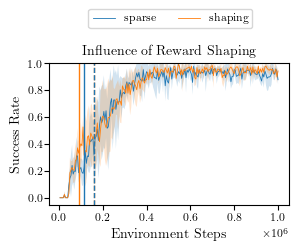

In [16]:
x_5 = np.load(seads_2x3_10skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x_5 <= 1000000)
x_5 = x_5[idx]

newest_sample_mean_succ_2x3_15_04_005, newest_sample_std_succ_2x3_15_04_005 =  get_parallel_succ(new_2x3_04_005_15, x_5, idx)
newest_sample_mean_succ_2x3_15_04_005_shaping, newest_sample_std_succ_2x3_15_04_005_shaping =  get_parallel_succ(new_2x3_shaping_15, x_5, idx)

# 2x3 puzzle
fig, ax = plt.subplots(1, 1, figsize=(0.5 * TEXTWIDTH +0.2, 0.5 * (TEXTWIDTH + 0.2) * (5**.5 - 1) / (2)))

ax.plot(x_5, newest_sample_mean_succ_2x3_15_04_005, c='tab:blue', linewidth=0.6, label="sparse")
ax.fill_between(x_5, newest_sample_mean_succ_2x3_15_04_005 + newest_sample_std_succ_2x3_15_04_005, newest_sample_mean_succ_2x3_15_04_005 - newest_sample_std_succ_2x3_15_04_005,facecolor='tab:blue', alpha=0.2)
ax.plot(x_5, newest_sample_mean_succ_2x3_15_04_005_shaping, c='tab:orange', linewidth=0.6, label="shaping")
ax.fill_between(x_5, newest_sample_mean_succ_2x3_15_04_005_shaping + newest_sample_std_succ_2x3_15_04_005_shaping, newest_sample_mean_succ_2x3_15_04_005_shaping - newest_sample_std_succ_2x3_15_04_005_shaping,facecolor='tab:orange', alpha=0.2)

ax.set_ylim(top=1.)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.8, 1.2))

ax.set_title("Influence of Reward Shaping")

ax.axvline(x=(94216 + 129144 + 86109 + 60202)/4, linewidth=1, c='tab:orange')
ax.axvline(x=(171876 + 148344 + 236312 + 74504)/4,ls="--", linewidth=1, c='tab:orange')

ax.axvline(x=(94352 + 106528 + 141470 + 109337)/4, linewidth=1, c='tab:blue')
ax.axvline(x=(110910 + 108293 + 183977 + 244135)/4,ls="--", linewidth=1, c='tab:blue')


ax.set_xlabel('Environment Steps')
ax.set_ylabel('Success Rate')
plt.savefig("Comparison-reward-shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)

In [17]:
x_5 = np.load(seads_2x3_10skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x_5 <= 930000)
x_5 = x_5[idx]

new_mean_succ_seads_2x3_10, new_std_succ_seads_2x3_10 = get_parallel_succ(seads_2x3_10skills, x_5, idx)
new_mean_succ_seads_2x3_3, new_std_succ_seads_2x3_3 = get_parallel_succ(seads_2x3_3skills, x_5, idx)
new_mean_succ_seads_2x3_15, new_std_succ_seads_2x3_15 = get_parallel_succ(seads_2x3_15skills, x_5, idx)
new_mean_succ_seads_2x3_20, new_std_succ_seads_2x3_20 = get_parallel_succ(seads_2x3_20skills, x_5, idx)

new_sample_mean_succ_2x3_3_03_005, new_sample_std_succ_2x3_3_03_005 =  get_parallel_succ(max_sample_03_005_3skills, x_5, idx)
new_sample_mean_succ_2x3_10_03_005, new_sample_std_succ_2x3_10_03_005 =  get_parallel_succ(max_sample_03_005_10skills, x_5, idx)
new_sample_mean_succ_2x3_15_03_005, new_sample_std_succ_2x3_15_03_005 =  get_parallel_succ(max_sample_03_005_15skills, x_5, idx)
new_sample_mean_succ_2x3_20_03_005, new_sample_std_succ_2x3_20_03_005 =  get_parallel_succ(max_sample_03_005_20skills, x_5, idx)

newest_sample_mean_succ_2x3_3_04_01, newest_sample_std_succ_2x3_3_04_01 =  get_parallel_succ(new_2x3_04_01_3, x_5, idx)
newest_sample_mean_succ_2x3_10_04_01, newest_sample_std_succ_2x3_10_04_01 =  get_parallel_succ(new_2x3_04_01_10, x_5, idx)
newest_sample_mean_succ_2x3_20_04_01, newest_sample_std_succ_2x3_20_04_01 =  get_parallel_succ(new_2x3_04_01_20, x_5, idx)

newest_sample_mean_succ_2x3_15_03_500, newest_sample_std_succ_2x3_15_03_500 =  get_parallel_succ(new_2x3_03_500_15, x_5, idx)
newest_sample_mean_succ_2x3_15_03_1000, newest_sample_std_succ_2x3_15_03_1000 =  get_parallel_succ(new_2x3_03_1000_15, x_5, idx)
newest_sample_mean_succ_2x3_15_03_direct, newest_sample_std_succ_2x3_15_03_direct =  get_parallel_succ(new_2x3_03_direct_15, x_5, idx)

newest_sample_mean_succ_2x3_15_02_005, newest_sample_std_succ_2x3_15_02_005 =  get_parallel_succ(new_2x3_02_005_15, x_5, idx)
newest_sample_mean_succ_2x3_15_03_005, newest_sample_std_succ_2x3_15_03_005 =  get_parallel_succ(new_2x3_03_005_15, x_5, idx)
newest_sample_mean_succ_2x3_15_04_01_1500, newest_sample_std_succ_2x3_15_04_01_1500 =  get_parallel_succ(new_2x3_04_01_1500_15, x_5, idx)
newest_sample_mean_succ_2x3_15_05_005, newest_sample_std_succ_2x3_15_05_005 =  get_parallel_succ(new_2x3_05_005_15, x_5, idx)
newest_sample_mean_succ_2x3_15_04_01, newest_sample_std_succ_2x3_15_04_01 =  get_parallel_succ(new_2x3_04_01_15, x_5, idx)
newest_sample_mean_succ_2x3_15_04_005, newest_sample_std_succ_2x3_15_04_005 =  get_parallel_succ(new_2x3_04_005_15, x_5, idx)


#new_sample_mean_succ_2x3_15_05_01, new_sample_std_succ_2x3_15_05_01 =  get_parallel_succ(max_sample_05_01_15skills, x_5, idx)
#new_sample_mean_succ_2x3_03_025, new_sample_std_succ_2x3_03_025 =  get_parallel_succ(new_sample_03_025, x_5, idx)
#new_sample_mean_succ_2x3_04_025, new_sample_std_succ_2x3_04_025 =  get_parallel_succ(new_sample_04_025, x_5, idx)
#new_sample_mean_succ_2x3_05_01, new_sample_std_succ_2x3_05_01 =  get_parallel_succ(new_sample_05_01, x_5, idx)

#new_sample_mean_succ_2x3_05_01_15skills, new_sample_std_succ_2x3_05_01_15skills =  get_parallel_succ(new_sample_05_01_15skills, x_5, idx)

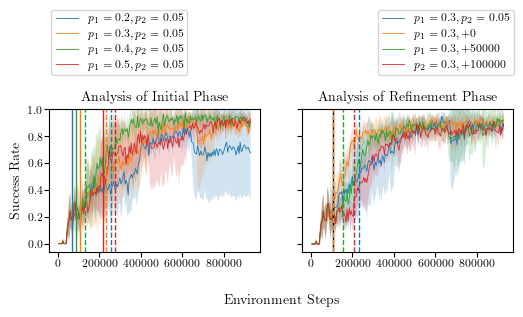

In [18]:
# 2x3 puzzle
fig, ax = plt.subplots(1, 2, figsize=(TEXTWIDTH +0.2, (TEXTWIDTH + 0.2) * (5**.5 - 1) / (2*2)))

# Initial phase
ax[0].plot(x_5, newest_sample_mean_succ_2x3_15_02_005, linewidth=0.6, c='tab:blue', label="$p_1 = 0.2, p_2 = 0.05$")
ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_15_02_005 + newest_sample_std_succ_2x3_15_02_005, newest_sample_mean_succ_2x3_15_02_005 - newest_sample_std_succ_2x3_15_02_005, facecolor='tab:blue',alpha=0.2)

ax[0].plot(x_5, newest_sample_mean_succ_2x3_15_03_005, linewidth=0.6,c='tab:orange', label="$p_1 = 0.3, p_2 = 0.05$")
ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_005 + newest_sample_std_succ_2x3_15_03_005, newest_sample_mean_succ_2x3_15_03_005 - newest_sample_std_succ_2x3_15_03_005,facecolor='tab:orange', alpha=0.2)

ax[0].plot(x_5, newest_sample_mean_succ_2x3_15_04_005, c='tab:green', linewidth=0.6, label="$p_1 = 0.4, p_2 = 0.05$")
ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_15_04_005 + newest_sample_std_succ_2x3_15_04_005, newest_sample_mean_succ_2x3_15_04_005 - newest_sample_std_succ_2x3_15_04_005,facecolor='tab:green', alpha=0.2)

ax[0].plot(x_5, newest_sample_mean_succ_2x3_15_05_005, linewidth=0.6,c='tab:red', label="$p_1 = 0.5, p_2 = 0.05$")
ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_15_05_005 + newest_sample_std_succ_2x3_15_05_005, newest_sample_mean_succ_2x3_15_05_005 - newest_sample_std_succ_2x3_15_05_005,facecolor='tab:red', alpha=0.2)


ax[0].axvline(x=(71513 + 68989 + 67335 + 65044 + 79504)/5, linewidth=1, c='tab:blue')
ax[0].axvline(x=(85473 + 369379 + 77156 + 366259 + 379525)/5,ls="--", linewidth=1, c="tab:blue")

ax[0].axvline(x=(82164 + 168795 + 106528 + 86835 + 84805)/5, linewidth=1, c='tab:orange')
ax[0].axvline(x=(83556 + 206074 + 108203 + 388054 + 385325)/5,ls="--", linewidth=1, c="tab:orange")

ax[0].axvline(x=(94352 + 106528 + 141470 + 109337)/5, linewidth=1, c='tab:green')
ax[0].axvline(x=(110910 + 108293 + 183977 + 244135)/5,ls="--", linewidth=1, c='tab:green')

ax[0].axvline(x=(176651 + 301260 + 140994 + 228512 + 235121)/5, linewidth=1, c='tab:red')
ax[0].axvline(x=(177954 + 602940 + 142335 + 230037 + 236858)/5,ls="--", linewidth=1, c="tab:red")


ax[1].plot(x_5, newest_sample_mean_succ_2x3_15_03_005, linewidth=0.6, c="tab:blue", label="$p_1 = 0.3, p_2 = 0.05$")
ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_005 + newest_sample_std_succ_2x3_15_03_005, newest_sample_mean_succ_2x3_15_03_005 - newest_sample_std_succ_2x3_15_03_005, alpha=0.2, facecolor="tab:blue")

ax[1].plot(x_5, newest_sample_mean_succ_2x3_15_03_direct, c="tab:orange", linewidth=0.6, label="$ p_1 = 0.3, +0$")
ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_direct + newest_sample_std_succ_2x3_15_03_direct, newest_sample_mean_succ_2x3_15_03_direct - newest_sample_std_succ_2x3_15_03_direct, alpha=0.2, facecolor="tab:orange")

ax[1].plot(x_5, newest_sample_mean_succ_2x3_15_03_500,c="tab:green", linewidth=0.6, label="$p_1 = 0.3, +50000$")
ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_500 + newest_sample_std_succ_2x3_15_03_500, newest_sample_mean_succ_2x3_15_03_500 - newest_sample_std_succ_2x3_15_03_500, alpha=0.2,facecolor="tab:green")

ax[1].plot(x_5, newest_sample_mean_succ_2x3_15_03_1000, c="tab:red", linewidth=0.6, label="$p_2 = 0.3, +100000$")
ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_1000 + newest_sample_std_succ_2x3_15_03_1000, newest_sample_mean_succ_2x3_15_03_1000 - newest_sample_std_succ_2x3_15_03_1000, alpha=0.2, facecolor="tab:red")

ax[1].axvline(x=(82164 + 168795 + 106528 + 86835 + 84805)/5, linewidth=1, c='black')
ax[1].axvline(x=(83556 + 206074 + 108203 + 388054 + 385324)/5,ls="--", linewidth=1, c="tab:blue")
ax[1].axvline(x=(82164 + 168795 + 106528 + 86835 + 84805)/5, ls="--", linewidth=1, c='tab:orange')
ax[1].axvline(x=(133239 + 218898 + 158252 + 137209 + 135910)/5, ls="--", linewidth=1, c='tab:green')
ax[1].axvline(x=(183198 + 270089 + 207902 + 187437 + 186046)/5, ls="--", linewidth=1, c='tab:red')

ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)


ax[0].set_title('Analysis of Initial Phase')
ax[1].set_title('Analysis of Refinement Phase')

ax[1].get_yaxis().set_ticklabels([])

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, bbox_to_anchor=(0.91, 1.45))

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, bbox_to_anchor=(0.365, 1.45))


ax[0].set_xlabel('Environment Steps')
ax[0].xaxis.set_label_coords(1.1, -0.3)
ax[0].set_ylabel('Success Rate')
plt.savefig("Comparison-3phase-params.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)

In [19]:
x_5 = np.load(seads_2x3_10skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x_5 <= 990000)
x_5 = x_5[idx]

new_mean_succ_seads_2x3_10, new_std_succ_seads_2x3_10 = get_parallel_succ(seads_2x3_10skills, x_5, idx)
new_mean_succ_seads_2x3_3, new_std_succ_seads_2x3_3 = get_parallel_succ(seads_2x3_3skills, x_5, idx)
new_mean_succ_seads_2x3_15, new_std_succ_seads_2x3_15 = get_parallel_succ(seads_2x3_15skills, x_5, idx)
new_mean_succ_seads_2x3_20, new_std_succ_seads_2x3_20 = get_parallel_succ(seads_2x3_20skills, x_5, idx)

new_sample_mean_succ_2x3_3_03_005, new_sample_std_succ_2x3_3_03_005 =  get_parallel_succ(max_sample_03_005_3skills, x_5, idx)
new_sample_mean_succ_2x3_10_03_005, new_sample_std_succ_2x3_10_03_005 =  get_parallel_succ(max_sample_03_005_10skills, x_5, idx)
new_sample_mean_succ_2x3_15_03_005, new_sample_std_succ_2x3_15_03_005 =  get_parallel_succ(max_sample_03_005_15skills, x_5, idx)
new_sample_mean_succ_2x3_20_03_005, new_sample_std_succ_2x3_20_03_005 =  get_parallel_succ(max_sample_03_005_20skills, x_5, idx)

newest_sample_mean_succ_2x3_3_04_005, newest_sample_std_succ_2x3_3_04_005 =  get_parallel_succ(new_2x3_04_005_3, x_5, idx)
newest_sample_mean_succ_2x3_10_04_01, newest_sample_std_succ_2x3_10_04_01 =  get_parallel_succ(new_2x3_04_01_10, x_5, idx)
newest_sample_mean_succ_2x3_10_04_005, newest_sample_std_succ_2x3_10_04_005 =  get_parallel_succ(new_2x3_04_005_10, x_5, idx)
newest_sample_mean_succ_2x3_15_04_005, newest_sample_std_succ_2x3_15_04_005 =  get_parallel_succ(new_2x3_04_005_15, x_5, idx)
newest_sample_mean_succ_2x3_20_04_005, newest_sample_std_succ_2x3_20_04_005 =  get_parallel_succ(new_2x3_04_005_20, x_5, idx)


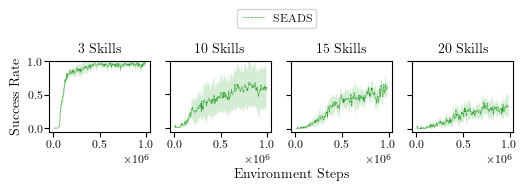

In [24]:
# 2x3 puzzle
fig, ax = plt.subplots(1, 4, figsize=(TEXTWIDTH +0.2, (TEXTWIDTH + 0.2) * (5**.5 - 1) / (2*4)))

ax[0].plot(x_5, new_mean_succ_seads_2x3_3, linewidth=0.6, c='tab:green', linestyle=(0, (1, 0.7)), label="SEADS")
ax[0].fill_between(x_5, new_mean_succ_seads_2x3_3 + new_std_succ_seads_2x3_3, new_mean_succ_seads_2x3_3 - new_std_succ_seads_2x3_3,facecolor='tab:green', alpha=0.2)

ax[1].plot(x_5, new_mean_succ_seads_2x3_10, linewidth=0.6, c='tab:green', linestyle=(0, (1, 0.7)), label="SEADS 10 skills")
ax[1].fill_between(x_5, new_mean_succ_seads_2x3_10 + new_std_succ_seads_2x3_10, new_mean_succ_seads_2x3_10 - new_std_succ_seads_2x3_10,facecolor='tab:green', alpha=0.2)

ax[2].plot(x_5, new_mean_succ_seads_2x3_15, linewidth=0.6, c='tab:green', linestyle=(0, (1, 0.7)), label="SEADS 15 skills")
ax[2].fill_between(x_5, new_mean_succ_seads_2x3_15 + new_std_succ_seads_2x3_15, new_mean_succ_seads_2x3_15 - new_std_succ_seads_2x3_15,facecolor='tab:green', alpha=0.2)

ax[3].plot(x_5, new_mean_succ_seads_2x3_20, linewidth=0.6 , c='tab:green', linestyle=(0, (1, 0.7)), label="SEADS 20 skills")
ax[3].fill_between(x_5, new_mean_succ_seads_2x3_20 + new_std_succ_seads_2x3_20, new_mean_succ_seads_2x3_20 - new_std_succ_seads_2x3_20,facecolor='tab:green', alpha=0.2)
"""
ax[0].plot(x_5, new_sample_mean_succ_2x3_3_03_005, c='tab:orange', linewidth=0.6, label="Biased 2Phase")
ax[0].fill_between(x_5, new_sample_mean_succ_2x3_3_03_005 + new_sample_std_succ_2x3_3_03_005, new_sample_mean_succ_2x3_3_03_005 - new_sample_std_succ_2x3_15_03_005, facecolor='tab:orange', alpha=0.2)

ax[1].plot(x_5, new_sample_mean_succ_2x3_10_03_005, c='tab:orange', linewidth=0.6, label="2Phase: 10 skills (change: 0.3)")
ax[1].fill_between(x_5, new_sample_mean_succ_2x3_10_03_005 + new_sample_std_succ_2x3_10_03_005, new_sample_mean_succ_2x3_10_03_005 - new_sample_std_succ_2x3_10_03_005,facecolor='tab:orange', alpha=0.2)

ax[2].plot(x_5, new_sample_mean_succ_2x3_15_03_005, c='tab:orange', linewidth=0.6, label="2Phase: 15 skills (change: 0.3)")
ax[2].fill_between(x_5, new_sample_mean_succ_2x3_15_03_005 + new_sample_std_succ_2x3_15_03_005, new_sample_mean_succ_2x3_15_03_005 - new_sample_std_succ_2x3_15_03_005,facecolor='tab:orange', alpha=0.2)

ax[3].plot(x_5, new_sample_mean_succ_2x3_20_03_005, c='tab:orange', linewidth=0.6, label="2Phase: 20 skills (change: 0.3, 0.05)")
ax[3].fill_between(x_5, new_sample_mean_succ_2x3_20_03_005 + new_sample_std_succ_2x3_20_03_005, new_sample_mean_succ_2x3_20_03_005 - new_sample_std_succ_2x3_15_03_005,facecolor='tab:orange', alpha=0.2)

ax[0].plot(x_5, newest_sample_mean_succ_2x3_3_04_005, c='tab:blue', linewidth=0.6, label="3Phase")
ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_3_04_005 + newest_sample_std_succ_2x3_3_04_005, newest_sample_mean_succ_2x3_3_04_005 - newest_sample_std_succ_2x3_3_04_005,facecolor='tab:blue', alpha=0.2)

ax[1].plot(x_5, newest_sample_mean_succ_2x3_10_04_005, c='tab:blue', linewidth=0.6, label="3Phase: 10 skills (change: 0.4, 0.05)")
ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_10_04_005 + newest_sample_std_succ_2x3_10_04_005, newest_sample_mean_succ_2x3_10_04_005 - newest_sample_std_succ_2x3_10_04_005,facecolor='tab:blue', alpha=0.2)

ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_04_005, c='tab:blue', linewidth=0.6, label="3Phase")
ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_04_005 + newest_sample_std_succ_2x3_15_04_005, newest_sample_mean_succ_2x3_15_04_005 - newest_sample_std_succ_2x3_15_04_005, facecolor='tab:blue',alpha=0.2)

ax[3].plot(x_5, newest_sample_mean_succ_2x3_20_04_005, c='tab:blue', linewidth=0.6, label="3Phase")
ax[3].fill_between(x_5, newest_sample_mean_succ_2x3_20_04_005 + newest_sample_std_succ_2x3_20_04_005, newest_sample_mean_succ_2x3_20_04_005 - newest_sample_std_succ_2x3_20_04_005,facecolor='tab:blue', alpha=0.2)

#ax[0].plot(x_5, newest_sample_mean_succ_2x3_3_04_01, linewidth=0.6, label="3Phase")
#ax[0].fill_between(x_5, newest_sample_mean_succ_2x3_3_04_01 + newest_sample_std_succ_2x3_3_04_01, newest_sample_mean_succ_2x3_3_04_01 - newest_sample_std_succ_2x3_3_04_01, alpha=0.2)

#ax[1].plot(x_5, newest_sample_mean_succ_2x3_10_04_01, linewidth=0.6, label="3Phase: 10 skills (change: 0.4, 0.05)")
#ax[1].fill_between(x_5, newest_sample_mean_succ_2x3_10_04_01 + newest_sample_std_succ_2x3_10_04_01, newest_sample_mean_succ_2x3_10_04_01 - newest_sample_std_succ_2x3_10_04_01, alpha=0.2)

#ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_04_01, linewidth=0.6, label="3Phase: 15 skills (change: 0.4, 0.1)")
#ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_04_01 + newest_sample_std_succ_2x3_15_04_01, newest_sample_mean_succ_2x3_15_04_01 - newest_sample_std_succ_2x3_15_04_01, alpha=0.2)

##ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_04_01_1500, linewidth=0.6, label="3Phase: 15 skills (change: 0.4, 0.05)")
##ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_04_01_1500 + newest_sample_std_succ_2x3_15_04_01_1500, newest_sample_mean_succ_2x3_15_04_01_1500 - newest_sample_std_succ_2x3_15_04_01_1500, alpha=0.2)

#ax[3].plot(x_5, newest_sample_mean_succ_2x3_20_04_01, linewidth=0.6, label="3Phase: 20 skills (change: 0.4, 0.05)")
#ax[3].fill_between(x_5, newest_sample_mean_succ_2x3_20_04_01 + newest_sample_std_succ_2x3_20_04_01, newest_sample_mean_succ_2x3_20_04_01 - newest_sample_std_succ_2x3_20_04_01, alpha=0.2)




# 15 skills


#ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_03_500, linewidth=0.6, label="3Phase: 15 skills (change: 0.3, +500)")
#ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_500 + newest_sample_std_succ_2x3_15_03_500, newest_sample_mean_succ_2x3_15_03_500 - newest_sample_std_succ_2x3_15_03_500, alpha=0.2)

#ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_03_1000, linewidth=0.6, label="3Phase: 15 skills (change: 0.3, +1000)")
#ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_1000 + newest_sample_std_succ_2x3_15_03_1000, newest_sample_mean_succ_2x3_15_03_1000 - newest_sample_std_succ_2x3_15_03_1000, alpha=0.2)







#ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_03_005, linewidth=0.6, label="3Phase: 15 skills (change: 0.3, 0.05)")
#ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_03_005 + newest_sample_std_succ_2x3_15_03_005, newest_sample_mean_succ_2x3_15_03_005 - newest_sample_std_succ_2x3_15_03_005, alpha=0.2)

#ax[2].plot(x_5, newest_sample_mean_succ_2x3_15_04_005, linewidth=0.6, label="3Phase: 15 skills (change: 0.4, 0.05)")
#ax[2].fill_between(x_5, newest_sample_mean_succ_2x3_15_04_005 + newest_sample_std_succ_2x3_15_04_005, newest_sample_mean_succ_2x3_15_04_005 - newest_sample_std_succ_2x3_15_04_005, alpha=0.2)

# 3 skills
ax[0].axvline(x=(334229 + 272344 + 369637 + 239225)/5, linewidth=1, c='tab:orange')
ax[0].axvline(x=(108691 + 153413 + 104676 + 287713 + 114637)/5, linewidth=1, c='tab:blue')
ax[0].axvline(x=(119726 + 304798 + 255588 + 290883 + 264767)/5,ls="--", linewidth=1, c='tab:blue')

# 10 skills
ax[1].axvline(x=(225069 + 87326 + 200379 + 372076 + 362498)/5, linewidth=1, c='tab:orange')
ax[1].axvline(x=(108691 + 153413 + 104676 + 287713 + 114637)/5, linewidth=1, c='tab:blue')
ax[1].axvline(x=(130392 + 304798 + 255588 + 292429 + 264767)/5,ls="--", linewidth=1, c='tab:blue')

# 15 skills
ax[2].axvline(x=(116793 + 132642 + 122800 + 75473 + 246667)/5, linewidth=1, c='tab:orange')
ax[2].axvline(x=(94352 + 106528 + 141470 + 109337)/4, linewidth=1, c='tab:blue')
ax[2].axvline(x=(110910 + 108293 + 183977 + 244135)/4,ls="--", linewidth=1, c='tab:blue')

# 20 skillS
ax[3].axvline(x=(104478 + 110774 + 151569 + 92296 + 76609)/5, linewidth=1, c='tab:orange')
ax[3].axvline(x=(115809 + 146904 + 176698 + 122299 + 198451)/5, linewidth=1, c='tab:blue')
ax[3].axvline(x=(266980 + 148536 + 178537 + 273484 + 216180)/5,ls="--", linewidth=1, c='tab:blue')
"""
ax[0].set_title("3 Skills")
ax[1].set_title("10 Skills")
ax[2].set_title("15 Skills")
ax[3].set_title("20 Skills")

ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)
ax[2].set_ylim(top=1.)
ax[3].set_ylim(top=1.)

ax[1].get_yaxis().set_ticklabels([])
ax[2].get_yaxis().set_ticklabels([])
ax[3].get_yaxis().set_ticklabels([])

handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.58, 1.5))


ax[1].set_xlabel('Environment Steps')
ax[1].xaxis.set_label_coords(1.2, -0.5)
ax[0].set_ylabel('Success Rate')
plt.savefig("Comparison-numskills-2x3.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)
plt.show()

In [28]:
new_2x2_04_005_2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills2_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x2_04_005_10 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/10-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills10_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x2_04_005_15 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/15-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

new_2x2_04_005_20 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/20-skills/new/parallel2x2-maxsampling-refine-04-005-correct_num_skills20_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [29]:
x = np.load(mine_2skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 490000)
x = x[idx]

# refinement phase start at p=0.5

mean_succ_seads_20, std_succ_seads_20 = get_parallel_succ(seads_20skills, x, idx)
mean_succ_20, std_succ_20 = get_parallel_succ(mine_20skills, x, idx)
mean_succ_3phase_20, std_succ_3phase_20 = get_parallel_succ(new_2x2_04_005_20, x, idx)

mean_succ_seads_15, std_succ_seads_15 = get_parallel_succ(seads_15skills, x, idx)
mean_succ_15, std_succ_15 = get_parallel_succ(mine_15skills, x, idx)
mean_succ_3phase_15, std_succ_3phase_15 = get_parallel_succ(new_2x2_04_005_15, x, idx)

#mean_succ_15_norefine, std_succ_15_norefine = get_parallel_succ(mine_15skills_norefinement, x, idx)
#mean_succ_15_noinit, std_succ_15_noinit = get_parallel_succ(mine_15skills_noinit, x, idx)

#mean_succ_seads_14, std_succ_seads_14 = get_parallel_succ(seads_14skills, x, idx)
#mean_succ_14, std_succ_14 = get_parallel_succ(mine_14skills, x, idx)

mean_succ_seads_10, std_succ_seads_10 = get_parallel_succ(seads_10skills, x, idx)
mean_succ_10, std_succ_10 = get_parallel_succ(mine_10skills, x, idx)
mean_succ_3phase_10, std_succ_3phase_10 = get_parallel_succ(new_2x2_04_005_10, x, idx)

mean_succ_seads_5, std_succ_seads_5 = get_parallel_succ(seads_5skills, x, idx)
mean_succ_5, std_succ_5 = get_parallel_succ(mine_5skills, x, idx)

mean_succ_seads_2, std_succ_seads_2 = get_parallel_succ(seads_2skills, x, idx)
mean_succ_2, std_succ_2 = get_parallel_succ(mine_2skills, x, idx)
mean_succ_3phase_2, std_succ_3phase_2 = get_parallel_succ(new_2x2_04_005_2, x, idx)

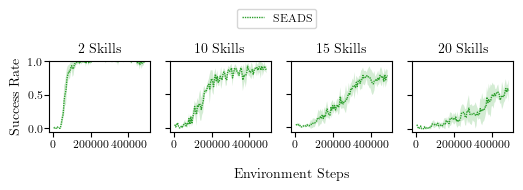

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(TEXTWIDTH +0.2, (TEXTWIDTH + 0.2) * (5**.5 - 1) / (2*4)))


# SEADS 2x2
ax[0].fill_between(x, mean_succ_seads_2 + std_succ_seads_2, mean_succ_seads_2 - std_succ_seads_2, alpha=0.2, facecolor='tab:green')
ax[1].fill_between(x, mean_succ_seads_10 + std_succ_seads_10, mean_succ_seads_10 - std_succ_seads_10, alpha=0.2, facecolor='tab:green')
ax[2].fill_between(x, mean_succ_seads_15 + std_succ_seads_15, mean_succ_seads_15 - std_succ_seads_15, alpha=0.2, facecolor='tab:green')
ax[3].fill_between(x, mean_succ_seads_20 + std_succ_seads_20, mean_succ_seads_20 - std_succ_seads_20, alpha=0.2, facecolor='tab:green')
"""
# Ours 2 phase2x2
ax[0].fill_between(x, mean_succ_2 + std_succ_2, mean_succ_2 - std_succ_2, alpha=0.2, facecolor='tab:orange')
ax[1].fill_between(x, mean_succ_10 + std_succ_10, mean_succ_10 - std_succ_10, alpha=0.2, facecolor='tab:orange')
ax[2].fill_between(x, mean_succ_15 + std_succ_15, mean_succ_15 - std_succ_15, alpha=0.2, facecolor='tab:orange')
ax[3].fill_between(x, mean_succ_20 + std_succ_20, mean_succ_20 - std_succ_20, alpha=0.2, facecolor='tab:orange')
# Ours 3phase 3x3
ax[0].fill_between(x, mean_succ_3phase_2 + std_succ_3phase_2, mean_succ_3phase_2 - std_succ_3phase_2, alpha=0.2, facecolor='tab:blue')
ax[1].fill_between(x, mean_succ_3phase_10 + std_succ_3phase_10, mean_succ_3phase_10 - std_succ_3phase_10, alpha=0.2, facecolor='tab:blue')
ax[2].fill_between(x, mean_succ_3phase_15 + std_succ_3phase_15, mean_succ_3phase_15 - std_succ_3phase_15, alpha=0.2, facecolor='tab:blue')
ax[3].fill_between(x, mean_succ_3phase_20 + std_succ_3phase_20, mean_succ_3phase_20 - std_succ_3phase_20, alpha=0.2, facecolor='tab:blue')
"""
# SEADS 2x2
ax[0].plot(x, mean_succ_seads_2, linestyle=(0, (1, 0.7)), linewidth=1, c='tab:green', label="SEADS")
ax[1].plot(x, mean_succ_seads_10, linestyle=(0, (1, 0.7)), linewidth=1, c='tab:green', label="SEADS: 10 skills")
ax[2].plot(x, mean_succ_seads_15, linestyle=(0, (1, 0.7)), linewidth=1, c='tab:green', label="SEADS: 15 skills")
ax[3].plot(x, mean_succ_seads_20, linestyle=(0, (1, 0.7)), linewidth=1, c='tab:green', label="SEADS: 20 skills")
"""
#ax[0, 0].plot(x, mean_succ_seads_14, 'tab:blue', ls='--', label="SEADS: 14 skills")
#ax[0, 0].fill_between(x, mean_succ_seads_14 + std_succ_seads_14, mean_succ_seads_14 - std_succ_seads_14, alpha=0.

#ax[0].plot(x, mean_succ_seads_5, 'tab:green', ls='--', label="SEADS: 5 skills")
#ax[0].fill_between(x, mean_succ_seads_5 + std_succ_seads_5, mean_succ_seads_5 - std_succ_seads_5, alpha=0.3)

# Ours (2phase) 2x2
ax[0].plot(x, mean_succ_2, linewidth=1, c='tab:orange', label="Biased 2Phase")
ax[1].plot(x, mean_succ_10,linewidth=1, c='tab:orange', label="2Phase: 10 skills")
ax[2].plot(x, mean_succ_15,linewidth=1,c='tab:orange', label="2Phase: 15 skills")
ax[3].plot(x, mean_succ_20,linewidth=1,c='tab:orange',label="2Phase: 20 skills")

# Ours 3phase 2x2
ax[0].plot(x, mean_succ_3phase_2, linewidth=1, c='tab:blue', label="3Phase")
ax[1].plot(x, mean_succ_3phase_10, linewidth=1, c='tab:blue', label="3Phase")
ax[2].plot(x, mean_succ_3phase_15, linewidth=1, c='tab:blue', label="3Phase")
ax[3].plot(x, mean_succ_3phase_20, linewidth=1, c='tab:blue', label="3Phase")



#ax[0, 0].plot(x, mean_succ_5, 'tab:green', label="Mine: 5 skills")
#ax[0, 0].fill_between(x, mean_succ_5 + std_succ_5, mean_succ_5 - std_succ_5, color='tab:green', alpha=0.3)


# compare changing criterion in 2x3 puzzle
#ax[1, 1].plot(x_3, mean_succ_seads_2x3_10_2, ls='--', label="SEADS: 10 skills")
#ax[1, 1].fill_between(x_3, mean_succ_seads_2x3_10_2 + std_succ_seads_2x3_10_2, mean_succ_seads_2x3_10_2 - std_succ_seads_2x3_10_2, alpha=0.3)
#
##ax[1, 1].plot(x_3, mean_succ_2x3_10_2, label="Changes: 0.3, 0.5")
##ax[1, 1].fill_between(x_3, mean_succ_2x3_10_2 + std_succ_2x3_10_2, mean_succ_2x3_10_2 - std_succ_2x3_10_2, alpha=0.3)
#
##ax[1, 1].plot(x_3, mean_succ_2x3_03_09, label="Changes: 0.3, 0.9")
##ax[1, 1].fill_between(x_3, mean_succ_2x3_03_09 + std_succ_2x3_03_09, mean_succ_2x3_03_09 - std_succ_2x3_03_09, alpha=0.3)
#
#ax[1, 1].plot(x_3, mean_succ_2x3_0_04, label="Changes: -, 0.4")
#ax[1, 1].fill_between(x_3, mean_succ_2x3_0_04 + std_succ_2x3_0_04, mean_succ_2x3_0_04 - std_succ_2x3_0_04, alpha=0.3)
#
#ax[1, 1].plot(x_3, mean_succ_2x3_025_04, label="Changes: 0.25, 0.4")
#ax[1, 1].fill_between(x_3, mean_succ_2x3_025_04 + std_succ_2x3_025_04, mean_succ_2x3_025_04 - std_succ_2x3_025_04, alpha=0.3)
#
#ax[1, 1].plot(x_3, mean_succ_2x3_05_07, label="Changes: 0.5, 0.7")
#ax[1, 1].fill_between(x_3, mean_succ_2x3_05_07 + std_succ_2x3_05_07, mean_succ_2x3_05_07 - std_succ_2x3_05_07, alpha=0.3)

#ax[1, 1].plot(x_5, new_mean_succ_seads_2x3_10, label="SEADS 10 skills")
#ax[1, 1].fill_between(x_5, new_mean_succ_seads_2x3_10 + new_std_succ_seads_2x3_10, new_mean_succ_seads_2x3_10 - new_std_succ_seads_2x3_10, alpha=0.3)

#ax[1, 1].plot(x_5, new_sample_mean_succ_2x3_03_025, label="Changes: 0.3, 0.25")
#ax[1, 1].fill_between(x_5, new_sample_mean_succ_2x3_03_025 + new_sample_std_succ_2x3_03_025, new_sample_mean_succ_2x3_03_025 - new_sample_std_succ_2x3_03_025, alpha=0.3)

#ax[1, 1].plot(x_5, new_sample_mean_succ_2x3_04_025, label="Changes: 0.4, 0.25")
#ax[1, 1].fill_between(x_5, new_sample_mean_succ_2x3_04_025 + new_sample_std_succ_2x3_04_025, new_sample_mean_succ_2x3_04_025 - new_sample_std_succ_2x3_04_025, alpha=0.3)

#ax[1, 1].plot(x_5, new_sample_mean_succ_2x3_05_01, label="Changes: 0.5, 0.1")
#ax[1, 1].fill_between(x_5, new_sample_mean_succ_2x3_05_01 + new_sample_std_succ_2x3_05_01, new_sample_mean_succ_2x3_05_01 - new_sample_std_succ_2x3_05_01, alpha=0.3)

#ax[1, 1].plot(x_5, new_sample_mean_succ_2x3_05_01_15skills, label="Changes: 0.5, 0.1, 15 skills")
#ax[1, 1].fill_between(x_5, new_sample_mean_succ_2x3_05_01_15skills + new_sample_std_succ_2x3_05_01_15skills, new_sample_mean_succ_2x3_05_01_15skills - new_sample_std_succ_2x3_05_01_15skills, alpha=0.3)

#ax[1, 1].plot(x_4, new_mean_succ_2x3_0_03, label="Changes: no init, 0.3")
#ax[1, 1].fill_between(x_4, new_mean_succ_2x3_0_03 + new_std_succ_2x3_0_03, new_mean_succ_2x3_0_03 - new_std_succ_2x3_0_03, alpha=0.3)
#
#ax[1, 1].plot(x_4, new_mean_succ_2x3_03_03, label="Changes: 0.3, 0.3")
#ax[1, 1].fill_between(x_4, new_mean_succ_2x3_03_03 + new_std_succ_2x3_03_03, new_mean_succ_2x3_03_03 - new_std_succ_2x3_03_03, alpha=0.3)

#ax[1, 1].plot(x_4, new_mean_succ_2x3_05_03, label="Changes: 0.5, 0.3")
#ax[1, 1].fill_between(x_4, new_mean_succ_2x3_05_03 + new_std_succ_2x3_05_03, new_mean_succ_2x3_05_03 - new_std_succ_2x3_05_03, alpha=0.3)

# 2 skills
ax[0].axvline(x=(67467 + 75496 + 74691 + 73607)/4, linewidth=1 , c='tab:orange')
ax[0].axvline(x=(76092 + 62488 + 66912 + 69655 + 67861)/5, linewidth=1 , c='tab:blue')
ax[0].axvline(x=(78333 + 64269 + 67322 + 70763 + 68191)/5, linewidth=1 ,ls="--", c='tab:blue')

# plot for 10 skills when changes in rewards scheme happened
ax[1].axvline(x=(63435 + 59722 + 60021 + 59490 + 58260)/5, linewidth=1 , c='tab:orange')
ax[1].axvline(x=(69966 + 69746 + 71130 + 65776 + 64319)/5, linewidth=1 , c='tab:blue')
ax[1].axvline(x=(71075 + 70732 + 72390 + 69196 + 64998)/5, linewidth=1 ,ls="--", c='tab:blue')

# 15 skills
ax[2].axvline(x=(56258 + 62516 + 61461 + 59313)/4, linewidth=1 , c='tab:orange')
ax[2].axvline(x=(35356 + 68656 + 69980 + 56880 + 67654)/5, linewidth=1 , c='tab:blue')
ax[2].axvline(x=(54941 + 69910 + 71146 + 58303 + 69045)/5, linewidth=1 ,ls="--", c='tab:blue')

# 20 skills
ax[3].axvline(x=(56313 + 56580 + 57045 + 57793 + 70212)/5, linewidth=1 , c='tab:orange')
ax[3].axvline(x=(69746 + 33171 + 68075 + 67270 + 67491)/5, linewidth=1 , c='tab:blue')
ax[3].axvline(x=(71398 + 35171 + 69459 + 68618 + 68704)/5, linewidth=1 ,ls="--", c='tab:blue')
"""
ax[0].set_title("2 Skills")
ax[1].set_title("10 Skills")
ax[2].set_title("15 Skills")
ax[3].set_title("20 Skills")

ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)
ax[2].set_ylim(top=1.)
ax[3].set_ylim(top=1.)

ax[1].get_yaxis().set_ticklabels([])
ax[2].get_yaxis().set_ticklabels([])
ax[3].get_yaxis().set_ticklabels([])


ax[1].set_xlabel('Environment Steps')
ax[1].xaxis.set_label_coords(1.2, -0.5)
ax[0].set_ylabel('Success Rate')
#ax[0].set_ylabel('Success Rate')
handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.58, 1.5))
#fig.tight_layout()
plt.savefig("Comparison-numskills-2x2.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

## Influence of different transtiion parameters

In [24]:
new_no_init = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/new/parallel2x3-maxsampling-0-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/new/parallel2x3-maxsampling-0-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/new/parallel2x3-maxsampling-0-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/new/parallel2x3-maxsampling-0-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
               "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/new/parallel2x3-maxsampling-0-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

max_sample_0_005_15skills = [#"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/parallel2x3-maxsampling-0-005-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/parallel2x3-maxsampling-0-005-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/parallel2x3-maxsampling-0-005-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/parallel2x3-maxsampling-0-005-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-0-005/parallel2x3-maxsampling-0-005-noinit_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

max_sample_05_005_15skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-005/parallel2x3-maxsampling-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed105399/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-005/parallel2x3-maxsampling-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-005/parallel2x3-maxsampling-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed195738/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-005/parallel2x3-maxsampling-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed285910/evaluations.npz",
                              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_many-skills/mine/2x3/15-skills/new_refinement/max-sampling/change-05-005/parallel2x3-maxsampling-05-005_num_skills15_sparseTrue_relabelingFalse_priorbufferFalse_seed578907/evaluations.npz"]

In [25]:
x_no = np.load(max_sample_03_005_15skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x_no <= 710000)
x_no = x_no[idx]

new_mean_succ_seads_2x3_15, new_std_succ_seads_2x3_15 = get_parallel_succ(seads_2x3_15skills, x_no, idx)
mean_succ_2x3_15_03_005_2, std_succ_2x3_15_03_005_2 =  get_parallel_succ(max_sample_03_005_15skills, x_no, idx)
mean_succ_2x3_15_03_0, std_succ_2x3_15_03_0 =  get_parallel_succ(max_sample_03_0_15skills, x_no, idx)


#mean_succ_2x3_15_0_005, std_succ_2x3_15_0_005 =  get_parallel_succ(new_no_init, x_no, idx)

In [26]:
x_param = np.load(max_sample_03_005_15skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x_param <= 820000)
x_param = x_param[idx]

mean_succ_2x3_15_02_005, std_succ_2x3_15_02_005 =  get_parallel_succ(max_sample_02_005_15skills, x_param, idx)
mean_succ_2x3_15_03_005, std_succ_2x3_15_03_005 =  get_parallel_succ(max_sample_03_005_15skills, x_param, idx)
mean_succ_2x3_15_05_005, std_succ_2x3_15_05_005 =  get_parallel_succ(max_sample_05_005_15skills, x_param, idx)
mean_succ_2x3_15_07_005, std_succ_2x3_15_07_005 =  get_parallel_succ(max_sample_07_005_15skills, x_param, idx)
mean_succ_2x3_15_0_005, std_succ_2x3_15_0_005 =  get_parallel_succ(max_sample_0_005_15skills, x_param, idx)

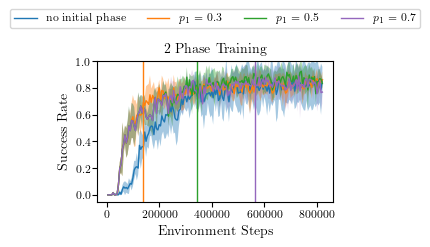

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(0.5 * TEXTWIDTH +0.15, 0.5 * (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2)))

ax.plot(x_param, mean_succ_2x3_15_0_005, linewidth=1, c='tab:blue', label="no initial phase")
ax.fill_between(x_param, mean_succ_2x3_15_0_005 + std_succ_2x3_15_0_005, mean_succ_2x3_15_0_005 - std_succ_2x3_15_0_005, facecolor='tab:blue', alpha=0.4)

#ax.plot(x_param, mean_succ_2x3_15_02_005, label="p = 0.2")
#ax.fill_between(x_param, mean_succ_2x3_15_02_005 + std_succ_2x3_15_02_005, mean_succ_2x3_15_02_005 - std_succ_2x3_15_02_005, alpha=0.2)

ax.plot(x_param, mean_succ_2x3_15_03_005, linewidth=1, c='tab:orange', label="$p_1$ = 0.3")
ax.fill_between(x_param, mean_succ_2x3_15_03_005 + std_succ_2x3_15_03_005, mean_succ_2x3_15_03_005 - std_succ_2x3_15_03_005, facecolor='tab:orange', alpha=0.4)

ax.plot(x_param, mean_succ_2x3_15_05_005, linewidth=1, c='tab:green', label="$p_1$ = 0.5")
ax.fill_between(x_param, mean_succ_2x3_15_05_005 + std_succ_2x3_15_05_005, mean_succ_2x3_15_05_005 - std_succ_2x3_15_05_005, facecolor='tab:green',alpha=0.4)

ax.plot(x_param, mean_succ_2x3_15_07_005, linewidth=1, c='tab:purple', label="$p_1$ = 0.7")
ax.fill_between(x_param, mean_succ_2x3_15_07_005 + std_succ_2x3_15_07_005, mean_succ_2x3_15_07_005 - std_succ_2x3_15_07_005,facecolor='tab:purple', alpha=0.2)

ax.axvline(x=(116793 + 132642 + 122800 + 75473 + 246667)/5, linewidth=1, c="tab:orange")
ax.axvline(x=(224174 + 599338 + 199733 + 331698 + 358085)/5, linewidth=1, c="tab:green")
ax.axvline(x=(799849 + 306386 + 331698 + 814399)/4, linewidth=1, c='tab:purple')


# leave ot different phases
#ax[0].plot(x_no, new_mean_succ_seads_2x3_15, linewidth=1, label="SEADS")
#ax[0].fill_between(x_no, new_mean_succ_seads_2x3_15 + new_std_succ_seads_2x3_15, new_mean_succ_seads_2x3_15 - new_std_succ_seads_2x3_15, alpha=0.9)
#
#ax[0].plot(x_no, mean_succ_2x3_15_03_005_2, linewidth=1, label="3Phase")
#ax[0].fill_between(x_no, mean_succ_2x3_15_03_005_2 + std_succ_2x3_15_03_005_2, mean_succ_2x3_15_03_005_2 - std_succ_2x3_15_03_005_2, alpha=0.5)
#
##ax[0].plot(x_no, mean_succ_2x3_15_0_005, c="tab:green", label="No initial phase")
##ax[0].fill_between(x_no, mean_succ_2x3_15_0_005 + std_succ_2x3_15_0_005, mean_succ_2x3_15_0_005 - std_succ_2x3_15_0_005, alpha=0.2)
#
#ax[0].plot(x_no, mean_succ_2x3_15_03_0, c='tab:red', linewidth=1, label="No refinement phase")
#ax[0].fill_between(x_no, mean_succ_2x3_15_03_0 + std_succ_2x3_15_03_0, mean_succ_2x3_15_03_0 - std_succ_2x3_15_03_0, alpha=0.1)

ax.set_ylim(top=1.)

#ax[0].axvline(x=(116793 + 132642 + 122800 + 75473 + 246667)/5, linewidth=1, c='tab:red')
#ax[0].axvline(x=(210680 + 377360 + 378329 + 163890 + 253054)/5,ls="--", linewidth=1, c="tab:orange")
#ax[0].axvline(x=(443808 + 348348 + 205332 + 185166)/4,ls="--", linewidth=1, c="tab:green" )

ax.legend(loc='center', ncol=4, bbox_to_anchor=(0.5,1.3))

ax.set_title('2 Phase Training')
#ax[0].set_title('3 Phase Training')


ax.set_xlabel('Environment Steps')
ax.set_ylabel('Success Rate')
#handles, labels = ax[0].get_legend_handles_labels()

#fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.7,1.1))
plt.savefig("2phase-Influence-parameters.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)


plt.show()

# ** Planner anaylsis

In [28]:
import numpy as np

max_bfs = np.array([[0.8, 0.96, 0.98, 0.66, 0.86], [0.54, 0.9, 0.9, 0.5, 0.63], [0.4, 0.72, 0.86, 0.36, 0.6], [0.4, 0.66, 0.82, 0.2, 0.44], [0.32, 0.6, 0.82, 0.16, 0.34]])

max_bfs_replan = np.array([[0.98, 0.96, 0.98, 0.72, 1.0], [0.84, 0.88, 0.98, 0.56, 0.92], [0.76, 0.78, 1.0, 0.38, 0.9], [0.64, 0.8, 0.94, 0.18, 0.88], [0.56, 0.74, 0.9, 0.2, 0.94]])

dijkstra_replan = np.array([[0.96, 0.92, 0.98, 0.74, 1.0], [0.8, 0.86, 0.94, 0.7, 0.82], [0.6, 0.74, 0.98, 0.44, 0.86], [0.76, 0.66, 0.96, 0.38, 0.82], [0.62, 0.78, 0.92, 0.42, 0.76]])

dijkstra = np.array([[0.82, 0.86, 0.9, 0.82, 0.92], [0.62, 0.88, 0.82, 0.7, 0.58], [0.46, 0.7, 0.74, 0.52, 0.46], [0.52, 0.6, 0.66, 0.48, 0.34], [0.38, 0.52, 0.72, 0.28, 0.3]])


bfs = np.array([[0.78, 0.88, 0.9, 0.78, 0.9], [0.68, 0.8, 0.8, 0.52, 0.8], [0.66, 0.62, 0.8, 0.52, 0.8], [0.56, 0.64, 0.76, 0.32, 0.6], [0.48, 0.46, 0.7, 0.16, 0.4]])

bfs_replan = np.array([[0.92, 0.94, 1., 0.8, 1.], [0.82, 0.86, 0.96, 0.62, 0.9], [0.8, 0.72, 0.96, 0.3, 0.72], [0.76, 0.72, 0.9, 0.2, 0.78], [0.68, 0.52, 0.9, 0.18, 0.6]])

data = np.stack((max_bfs.T, max_bfs_replan.T, bfs.T, bfs_replan.T, dijkstra.T, dijkstra_replan.T))
data = data.T
print(data)

[[[0.8  0.98 0.78 0.92 0.82 0.96]
  [0.96 0.96 0.88 0.94 0.86 0.92]
  [0.98 0.98 0.9  1.   0.9  0.98]
  [0.66 0.72 0.78 0.8  0.82 0.74]
  [0.86 1.   0.9  1.   0.92 1.  ]]

 [[0.54 0.84 0.68 0.82 0.62 0.8 ]
  [0.9  0.88 0.8  0.86 0.88 0.86]
  [0.9  0.98 0.8  0.96 0.82 0.94]
  [0.5  0.56 0.52 0.62 0.7  0.7 ]
  [0.63 0.92 0.8  0.9  0.58 0.82]]

 [[0.4  0.76 0.66 0.8  0.46 0.6 ]
  [0.72 0.78 0.62 0.72 0.7  0.74]
  [0.86 1.   0.8  0.96 0.74 0.98]
  [0.36 0.38 0.52 0.3  0.52 0.44]
  [0.6  0.9  0.8  0.72 0.46 0.86]]

 [[0.4  0.64 0.56 0.76 0.52 0.76]
  [0.66 0.8  0.64 0.72 0.6  0.66]
  [0.82 0.94 0.76 0.9  0.66 0.96]
  [0.2  0.18 0.32 0.2  0.48 0.38]
  [0.44 0.88 0.6  0.78 0.34 0.82]]

 [[0.32 0.56 0.48 0.68 0.38 0.62]
  [0.6  0.74 0.46 0.52 0.52 0.78]
  [0.82 0.9  0.7  0.9  0.72 0.92]
  [0.16 0.2  0.16 0.18 0.28 0.42]
  [0.34 0.94 0.4  0.6  0.3  0.76]]]


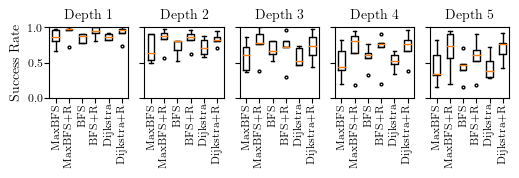

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2*4)))

plt.setp(ax, ylim=(0., 1.))

ax[1].get_yaxis().set_ticklabels([])
ax[2].get_yaxis().set_ticklabels([])
ax[3].get_yaxis().set_ticklabels([])
ax[4].get_yaxis().set_ticklabels([])

for i in range(5):
    ax[i].set_title(f'Depth {i+1}')
    ax[i].boxplot(data[i], flierprops={'markersize': 2})
    ax[i].get_xaxis().set_ticklabels(['MaxBFS', 'MaxBFS+R', 'BFS','BFS+R', 'Dijkstra', 'Dijkstra+R'], rotation=90)

ax[1].xaxis.set_label_coords(1.2, -0.3)
ax[0].set_ylabel('Success Rate')
plt.savefig("Comparison-planners.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)

plt.show()

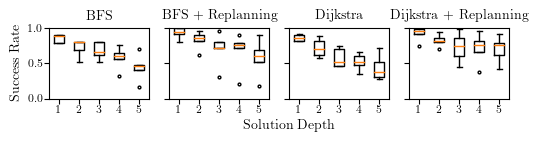

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2*4)))

plt.setp(ax, ylim=(0., 1.))
ax[0].set_title('BFS')
ax[0].boxplot(bfs.T, flierprops={'markersize': 2})

ax[1].set_title('BFS + Replanning')
ax[1].boxplot(bfs_replan.T, flierprops={'markersize': 2})

ax[2].set_title('Dijkstra')
ax[2].boxplot(dijkstra.T, flierprops={'markersize': 2})

ax[3].set_title('Dijkstra + Replanning')
ax[3].boxplot(dijkstra_replan.T, flierprops={'markersize': 2})

ax[1].get_yaxis().set_ticklabels([])
ax[2].get_yaxis().set_ticklabels([])
ax[3].get_yaxis().set_ticklabels([])

ax[1].set_xlabel('Solution Depth')
ax[1].xaxis.set_label_coords(1.2, -0.3)
ax[0].set_ylabel('Success Rate')
#plt.savefig("Comparison-planners.pdf",
#            bbox_inches='tight', dpi=plt.gcf().dpi)

plt.show()

## Influence of init and refinement phase

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

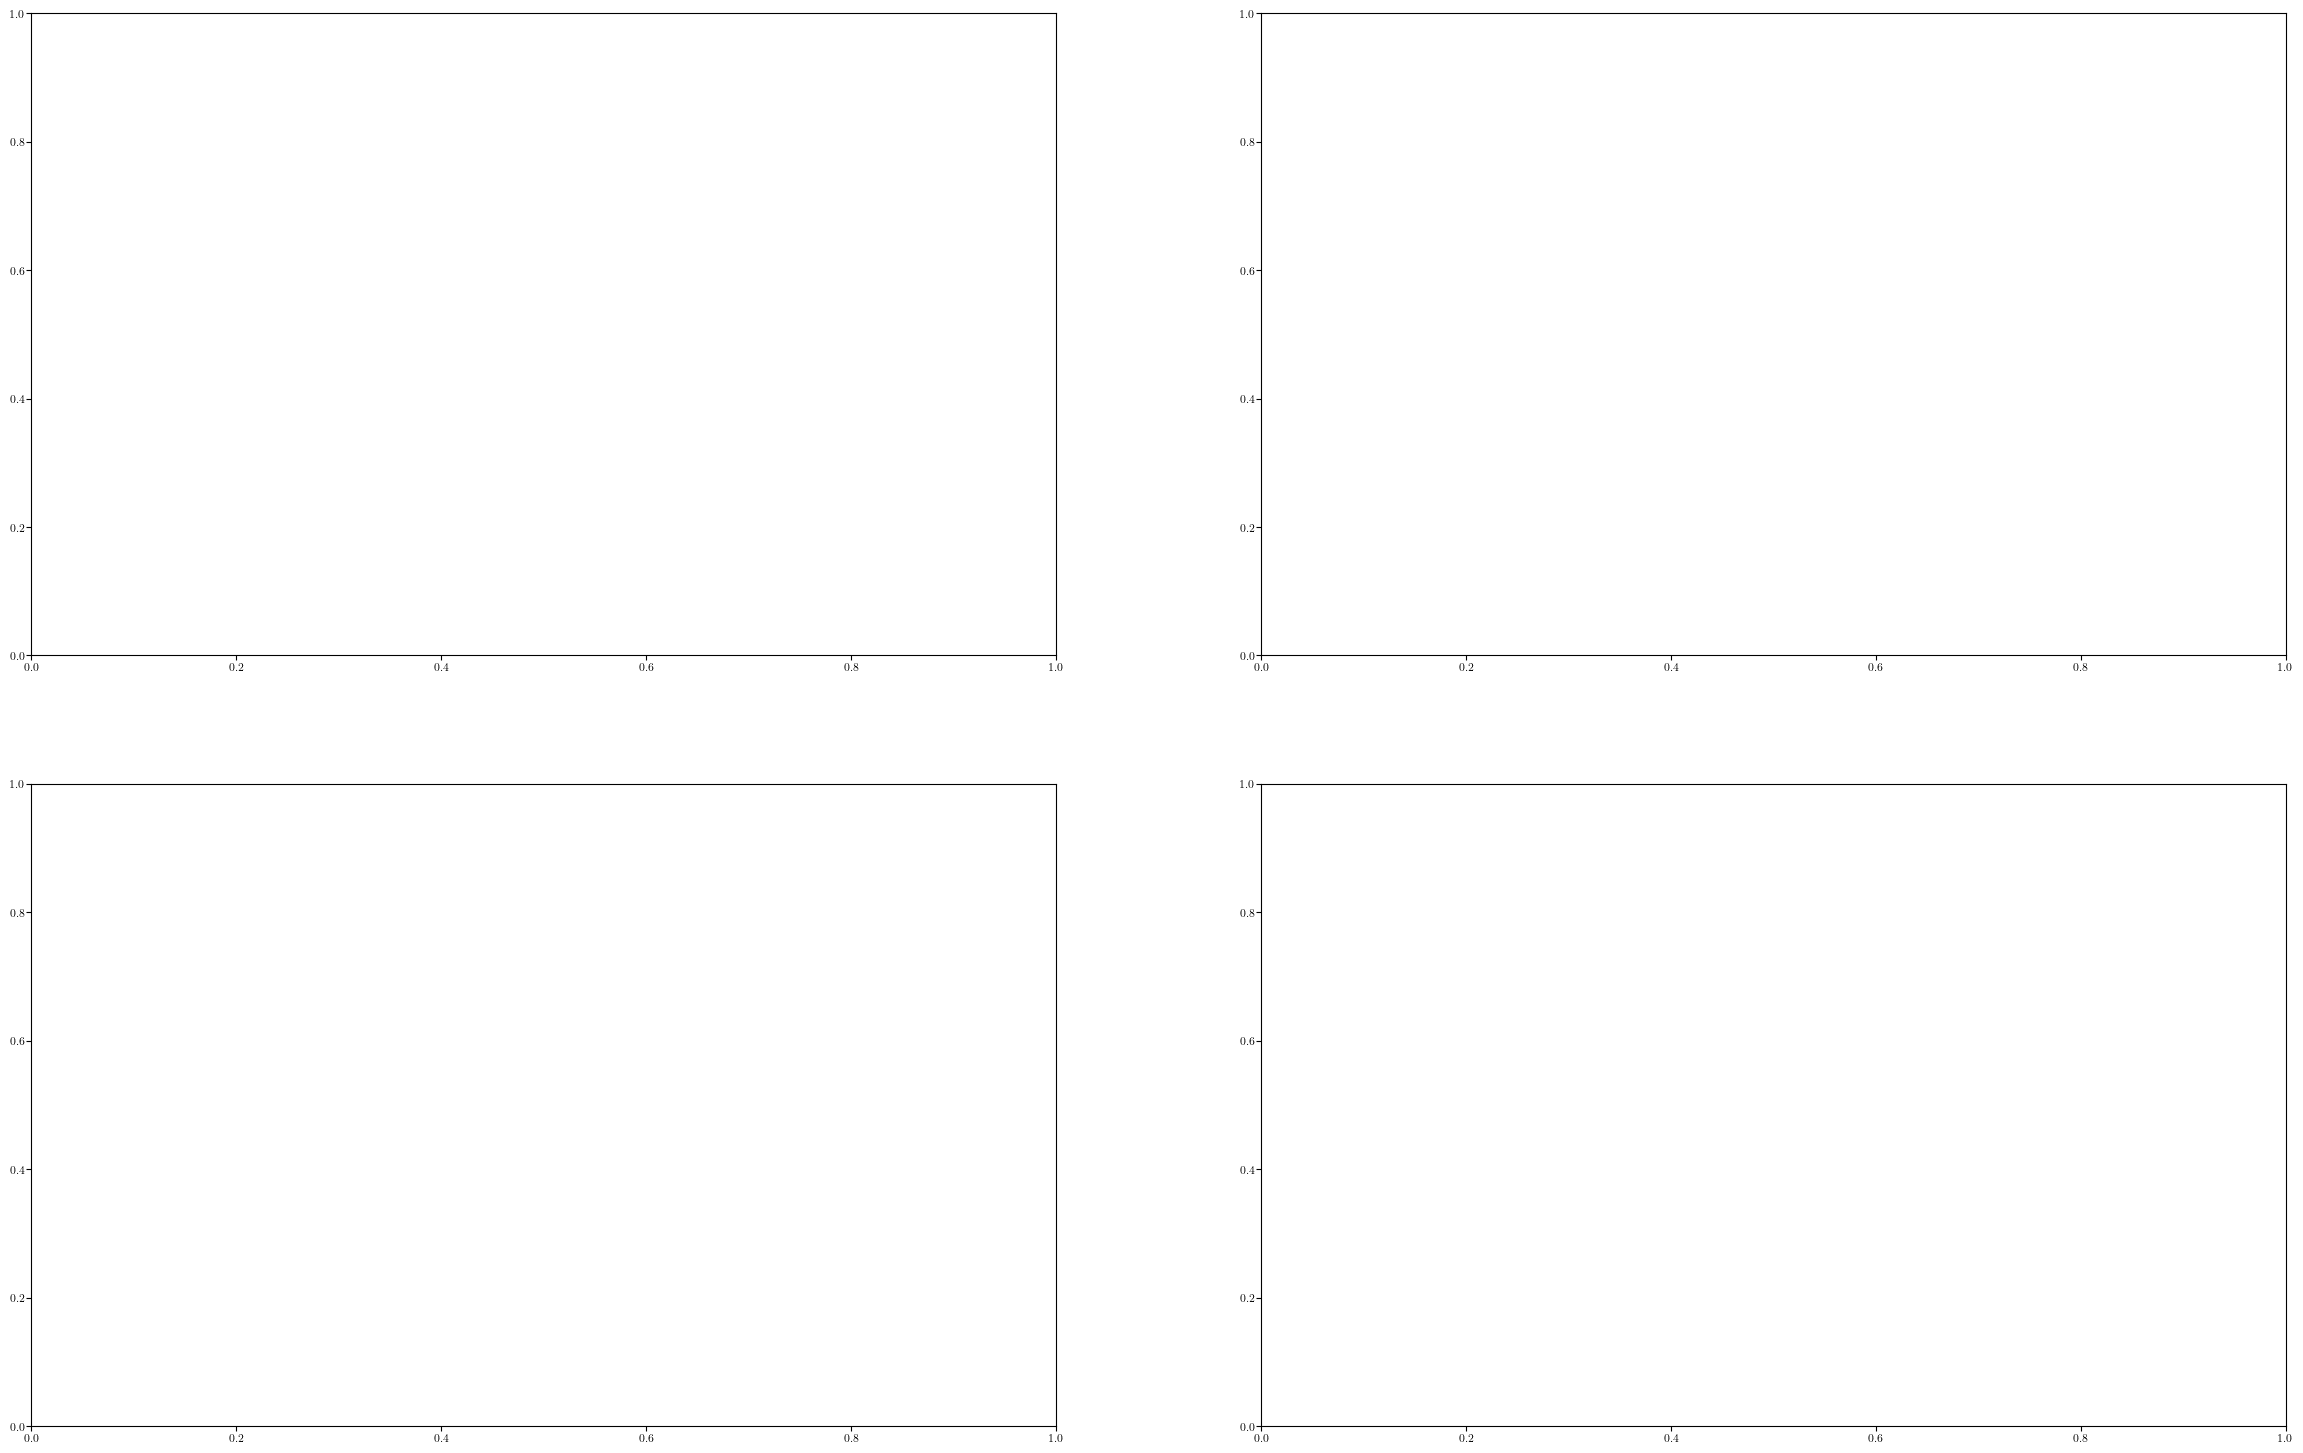

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(5*TEXTWIDTH +0.15, 5*(TEXTWIDTH + 0.15) * (5**.5 - 1) / (2)))

ax[0].plot(x, mean_succ_15, label="All phases")
ax[0].fill_between(x, mean_succ_15 + std_succ_15, mean_succ_15 - std_succ_15, alpha=0.3)

ax[0].plot(x, mean_succ_15_noinit, label="No initial phase")
ax[0].fill_between(x, mean_succ_15_noinit + std_succ_15_noinit, mean_succ_15_noinit - std_succ_15_noinit, alpha=0.3)

ax[0].plot(x, mean_succ_15_norefine, label="No refinement phase")
ax[0].fill_between(x, mean_succ_15_norefine + std_succ_15_norefine, mean_succ_15_norefine - std_succ_15_norefine, alpha=0.3)

ax[0].plot(x, mean_succ_seads_15, ls='--', label="SEADS")
ax[0].fill_between(x, mean_succ_seads_15 + std_succ_seads_15, mean_succ_seads_15 - std_succ_seads_15, alpha=0.3)


ax[0].axvline(x=(65795 + 69128 + 59152 + 68020)/4, c='black')
ax[0].axvline(x=(77528 + 88377 + 74437 + 106495)/4, c='black', ls='--')
ax[0].axvline(x=(435381 + 418033 + 303082 + 312552)/4, c='tab:orange', ls='--')


## We can see that the initial phase definitely has an impact, while the policies with many skills that have initial phase learn, quite much already, the policies with SEADS for 14 and 10 skills show no increase in performance at all in these first couple of steps

Initial phase accelerates training, but may under certain coditions, and if done to long reduce long-term performance
Refinement phase imroves performance, especially if training with many skills

## **Different Versions**

In [34]:
seads_all = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed105399/evaluations.npz",
             #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed578907/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all/parallelseads_2x3-all_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed937584/evaluations.npz"]

seads_nonovelty = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_novelty/parallelseads_2x3-nonovelty_num_skills3_relabelingTrue_noveltyFalse_seconbestTrue_seed105399/evaluations.npz",
                        #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_novelty/parallelseads_2x3-nonovelty_num_skills3_relabelingTrue_noveltyFalse_seconbestTrue_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_novelty/parallelseads_2x3-nonovelty_num_skills3_relabelingTrue_noveltyFalse_seconbestTrue_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_novelty/parallelseads_2x3-nonovelty_num_skills3_relabelingTrue_noveltyFalse_seconbestTrue_seed578907/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_novelty/parallelseads_2x3-nonovelty_num_skills3_relabelingTrue_noveltyFalse_seconbestTrue_seed937584/evaluations.npz"]

seads_nosecondbest = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_secondbest/parallelseads_2x3-nosecondbest_num_skills3_relabelingTrue_noveltyTrue_seconbestFalse_seed105399/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_secondbest/parallelseads_2x3-nosecondbest_num_skills3_relabelingTrue_noveltyTrue_seconbestFalse_seed123456/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_secondbest/parallelseads_2x3-nosecondbest_num_skills3_relabelingTrue_noveltyTrue_seconbestFalse_seed195738/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_secondbest/parallelseads_2x3-nosecondbest_num_skills3_relabelingTrue_noveltyTrue_seconbestFalse_seed285910/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_secondbest/parallelseads_2x3-nosecondbest_num_skills3_relabelingTrue_noveltyTrue_seconbestFalse_seed578907/evaluations.npz"]

seads_norelabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_relabeling/parallelseads_2x3-norelabeling_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed937584/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_relabeling/parallelseads_2x3-norelabeling_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_relabeling/parallelseads_2x3-norelabeling_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_relabeling/parallelseads_2x3-norelabeling_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed578907/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/no_relabeling/parallelseads_2x3-norelabeling_num_skills3_relabelingFalse_noveltyTrue_seconbestTrue_seed937584/evaluations.npz"]

seads_all_newnovelty = [#"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all_new_novelty/parallelseads_2x3-all-newnovelty_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed937584/evaluations.npz",
                        #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all_new_novelty/parallelseads_2x3-all-newnovelty_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all_new_novelty/parallelseads_2x3-all-newnovelty_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all_new_novelty/parallelseads_2x3-all-newnovelty_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed578907/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/all_new_novelty/parallelseads_2x3-all-newnovelty_num_skills3_relabelingTrue_noveltyTrue_seconbestTrue_seed937584/evaluations.npz"]

seads_onlynovelty = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-novelty/parallelseads_2x3-only-novelty_num_skills3_relabelingFalse_noveltyTrue_seconbestFalse_seed105399/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-novelty/parallelseads_2x3-only-novelty_num_skills3_relabelingFalse_noveltyTrue_seconbestFalse_seed123456/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-novelty/parallelseads_2x3-only-novelty_num_skills3_relabelingFalse_noveltyTrue_seconbestFalse_seed195738/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-novelty/parallelseads_2x3-only-novelty_num_skills3_relabelingFalse_noveltyTrue_seconbestFalse_seed285910/evaluations.npz",
                     "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-novelty/parallelseads_2x3-only-novelty_num_skills3_relabelingFalse_noveltyTrue_seconbestFalse_seed578907/evaluations.npz"]

seads_onlysecondbest = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-secondbest/parallelseads_2x3-only-secondbest_num_skills3_relabelingFalse_noveltyFalse_seconbestTrue_seed105399/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-secondbest/parallelseads_2x3-only-secondbest_num_skills3_relabelingFalse_noveltyFalse_seconbestTrue_seed123456/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-secondbest/parallelseads_2x3-only-secondbest_num_skills3_relabelingFalse_noveltyFalse_seconbestTrue_seed195738/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-secondbest/parallelseads_2x3-only-secondbest_num_skills3_relabelingFalse_noveltyFalse_seconbestTrue_seed285910/evaluations.npz",
                        "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-secondbest/parallelseads_2x3-only-secondbest_num_skills3_relabelingFalse_noveltyFalse_seconbestTrue_seed578907/evaluations.npz"]

seads = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/nothing/parallelseads_2x3_num_skills3_relabelingFalse_noveltyFalse_seconbestFalse_seed105399/evaluations.npz",
         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/nothing/parallelseads_2x3_num_skills3_relabelingFalse_noveltyFalse_seconbestFalse_seed123456/evaluations.npz",
         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/nothing/parallelseads_2x3_num_skills3_relabelingFalse_noveltyFalse_seconbestFalse_seed195738/evaluations.npz",
         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/nothing/parallelseads_2x3_num_skills3_relabelingFalse_noveltyFalse_seconbestFalse_seed285910/evaluations.npz",
         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/nothing/parallelseads_2x3_num_skills3_relabelingFalse_noveltyFalse_seconbestFalse_seed578907/evaluations.npz"]

seads_only_relabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-relabeling/parallelseads_2x3-onlyrelabeling_num_skills3_relabelingTrue_noveltyFalse_seconbestFalse_seed105399/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-relabeling/parallelseads_2x3-onlyrelabeling_num_skills3_relabelingTrue_noveltyFalse_seconbestFalse_seed123456/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-relabeling/parallelseads_2x3-onlyrelabeling_num_skills3_relabelingTrue_noveltyFalse_seconbestFalse_seed195738/evaluations.npz",
                         "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-relabeling/parallelseads_2x3-onlyrelabeling_num_skills3_relabelingTrue_noveltyFalse_seconbestFalse_seed285910/evaluations.npz"]#,
                         #"/home/rosa/Documents/Uni/Masterarbeit/checkpoints_SEADS/only-relabeling/parallelseads_2x3-onlyrelabeling_num_skills3_relabelingTrue_noveltyFalse_seconbestFalse_seed578907/evaluations.npz"]

In [35]:
mine_relabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_mine/parallel2x3-relabeling_num_skills3_sparseTrue_relabelingTrue_priorbufferFalse_seed123456/evaluations.npz"]

mine_norelabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_mine/parallel2x3-no-relabeling_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse_seed123456/evaluations.npz"]

mine_20per_relabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_mine/parallel2x3-20-perc-relabeling_num_skills3_sparseTrue_relabelingTrue_priorbufferFalse_seed123456/evaluations.npz"]

mine_fm_relabeling = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_mine/parallel2x3-fm-relabeling_num_skills3_sparseTrue_relabelingTrue_priorbufferFalse_seed123456/evaluations.npz"]

In [36]:
x1 = np.load(mine_relabeling[0], mmap_mode='r')["timesteps"]
idx = np.where(x1 <= 390000)
x1 = x1[idx]

mean_succ_2x3_mine_relabeling, std_succ_2x3_mine_relabeling = get_parallel_succ(mine_relabeling, x1, idx)
mean_succ_2x3_mine_norelabeling, std_succ_2x3_mine_norelabeling = get_parallel_succ(mine_norelabeling, x1, idx)
mean_succ_2x3_mine_20relabeling, std_succ_2x3_mine_20relabeling = get_parallel_succ(mine_20per_relabeling, x1, idx)
mean_succ_2x3_mine_fmrelabeling, std_succ_2x3_mine_fmrelabeling = get_parallel_succ(mine_fm_relabeling, x1, idx)

In [37]:
x0 = np.load(seads_all[0], mmap_mode='r')["timesteps"]
idx = np.where(x0 <= 400000)
x0 = x0[idx]

mean_succ_2x3_all, std_succ_2x3_all = get_parallel_succ(seads_all, x0, idx)
mean_succ_2x3_nonovelty, std_succ_2x3_nonovelty = get_parallel_succ(seads_nonovelty, x0, idx)
mean_succ_2x3_nosecondbest, std_succ_2x3_nosecondbest = get_parallel_succ(seads_nosecondbest, x0, idx)
mean_succ_2x3_norelabeling, std_succ_2x3_norelabeling = get_parallel_succ(seads_norelabeling, x0, idx)
mean_succ_2x3_all_newnovelty, std_succ_2x3_all_newnovelty = get_parallel_succ(seads_all_newnovelty, x0, idx)
mean_succ_2x3_novelty, std_succ_2x3_novelty = get_parallel_succ(seads_onlynovelty, x0, idx)
mean_succ_2x3_secondbest, std_succ_2x3_secondbest = get_parallel_succ(seads_onlysecondbest, x0, idx)
mean_succ_2x3_nothing, std_succ_2x3_nothing = get_parallel_succ(seads, x0, idx)
mean_succ_2x3_onlyrelabeling, std_succ_2x3_onlyrelabeling = get_parallel_succ(seads_only_relabeling, x0, idx)

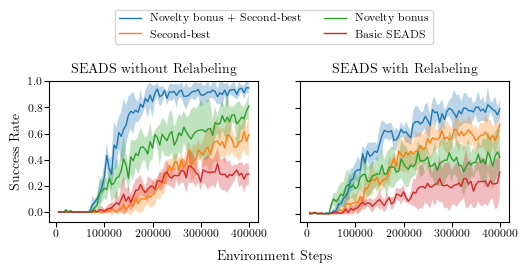

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2*2)))

# 2x2 puzzle
# 2 skills

ax[0].set_title("SEADS without Relabeling")
ax[1].set_title("SEADS with Relabeling")
ax[1].plot(x0, mean_succ_2x3_all, linewidth=1, label="Relabeling + Novelty bonus + Second-best")
ax[1].fill_between(x0, mean_succ_2x3_all + std_succ_2x3_all, mean_succ_2x3_all - std_succ_2x3_all, alpha=0.3)

ax[1].plot(x0, mean_succ_2x3_nonovelty, linewidth=1, label="Relabeling + Second-best")
ax[1].fill_between(x0, mean_succ_2x3_nonovelty + std_succ_2x3_nonovelty, mean_succ_2x3_nonovelty - std_succ_2x3_nonovelty, alpha=0.3)

ax[1].plot(x0, mean_succ_2x3_nosecondbest, linewidth=1, label="Relabeling + Novelty Bonus")
ax[1].fill_between(x0, mean_succ_2x3_nosecondbest + std_succ_2x3_nosecondbest, mean_succ_2x3_nosecondbest - std_succ_2x3_nosecondbest, alpha=0.3)

ax[0].plot(x0, mean_succ_2x3_norelabeling, linewidth=1, label="Novelty bonus + Second-best")
ax[0].fill_between(x0, mean_succ_2x3_norelabeling + std_succ_2x3_norelabeling, mean_succ_2x3_norelabeling - std_succ_2x3_norelabeling, alpha=0.3)

ax[0].plot(x0, mean_succ_2x3_secondbest, linewidth=1, label="Second-best")
ax[0].fill_between(x0, mean_succ_2x3_secondbest + std_succ_2x3_secondbest, mean_succ_2x3_secondbest - std_succ_2x3_secondbest, alpha=0.3)

ax[0].plot(x0, mean_succ_2x3_novelty, linewidth=1, label="Novelty bonus")
ax[0].fill_between(x0, mean_succ_2x3_novelty + std_succ_2x3_novelty, mean_succ_2x3_novelty - std_succ_2x3_novelty, alpha=0.3)

ax[0].plot(x0, mean_succ_2x3_nothing, linewidth=1, label="Basic SEADS")
ax[0].fill_between(x0, mean_succ_2x3_nothing + std_succ_2x3_nothing, mean_succ_2x3_nothing - std_succ_2x3_nothing, alpha=0.3)

ax[1].plot(x0, mean_succ_2x3_onlyrelabeling, linewidth=1, label="Basic SEADS")
ax[1].fill_between(x0, mean_succ_2x3_onlyrelabeling + std_succ_2x3_onlyrelabeling, mean_succ_2x3_onlyrelabeling - std_succ_2x3_onlyrelabeling, alpha=0.3)

#ax[1].plot(x0, mean_succ_2x3_all_newnovelty, label="Relabeling + New novelty reward + Second-best")
#ax[1].fill_between(x0, mean_succ_2x3_all_newnovelty + std_succ_2x3_all_newnovelty, mean_succ_2x3_all_newnovelty - std_succ_2x3_all_newnovelty, alpha=0.3)






#ax[1].plot(x1, mean_succ_2x3_mine_relabeling, label="Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_relabeling + std_succ_2x3_mine_relabeling, mean_succ_2x3_mine_relabeling - std_succ_2x3_mine_relabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_norelabeling, label="No Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_norelabeling + std_succ_2x3_mine_norelabeling, mean_succ_2x3_mine_norelabeling - std_succ_2x3_mine_norelabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_fmrelabeling, label="Only FM Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_fmrelabeling + std_succ_2x3_mine_fmrelabeling, mean_succ_2x3_mine_fmrelabeling - std_succ_2x3_mine_fmrelabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_20relabeling, label="20% RL Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_20relabeling + std_succ_2x3_mine_20relabeling, mean_succ_2x3_mine_20relabeling - std_succ_2x3_mine_20relabeling, alpha=0.3)

#ax[0].legend()
#ax[1].legend()


ax[1].get_yaxis().set_ticklabels([])

ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)


ax[0].set_xlabel('Environment Steps')
ax[0].xaxis.set_label_coords(1.08, -0.2)

ax[0].set_ylabel('Success Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.78, 1.3))
plt.savefig("Comparison-Relabeling.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

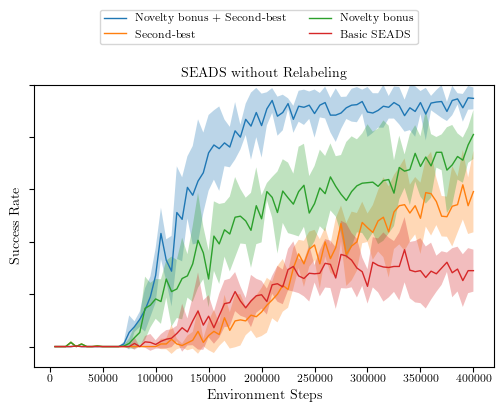

In [43]:
fig, ax = plt.subplots(1, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2)))

# 2x2 puzzle
# 2 skills

ax.set_title("SEADS without Relabeling")

ax.plot(x0, mean_succ_2x3_norelabeling, linewidth=1, label="Novelty bonus + Second-best")
ax.fill_between(x0, mean_succ_2x3_norelabeling + std_succ_2x3_norelabeling, mean_succ_2x3_norelabeling - std_succ_2x3_norelabeling, alpha=0.3)

ax.plot(x0, mean_succ_2x3_secondbest, linewidth=1, label="Second-best")
ax.fill_between(x0, mean_succ_2x3_secondbest + std_succ_2x3_secondbest, mean_succ_2x3_secondbest - std_succ_2x3_secondbest, alpha=0.3)

ax.plot(x0, mean_succ_2x3_novelty, linewidth=1, label="Novelty bonus")
ax.fill_between(x0, mean_succ_2x3_novelty + std_succ_2x3_novelty, mean_succ_2x3_novelty - std_succ_2x3_novelty, alpha=0.3)

ax.plot(x0, mean_succ_2x3_nothing, linewidth=1, label="Basic SEADS")
ax.fill_between(x0, mean_succ_2x3_nothing + std_succ_2x3_nothing, mean_succ_2x3_nothing - std_succ_2x3_nothing, alpha=0.3)


#ax[1].plot(x0, mean_succ_2x3_all_newnovelty, label="Relabeling + New novelty reward + Second-best")
#ax[1].fill_between(x0, mean_succ_2x3_all_newnovelty + std_succ_2x3_all_newnovelty, mean_succ_2x3_all_newnovelty - std_succ_2x3_all_newnovelty, alpha=0.3)






#ax[1].plot(x1, mean_succ_2x3_mine_relabeling, label="Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_relabeling + std_succ_2x3_mine_relabeling, mean_succ_2x3_mine_relabeling - std_succ_2x3_mine_relabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_norelabeling, label="No Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_norelabeling + std_succ_2x3_mine_norelabeling, mean_succ_2x3_mine_norelabeling - std_succ_2x3_mine_norelabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_fmrelabeling, label="Only FM Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_fmrelabeling + std_succ_2x3_mine_fmrelabeling, mean_succ_2x3_mine_fmrelabeling - std_succ_2x3_mine_fmrelabeling, alpha=0.3)
#
#ax[1].plot(x1, mean_succ_2x3_mine_20relabeling, label="20% RL Relabeling")
#ax[1].fill_between(x1, mean_succ_2x3_mine_20relabeling + std_succ_2x3_mine_20relabeling, mean_succ_2x3_mine_20relabeling - std_succ_2x3_mine_20relabeling, alpha=0.3)

#ax[0].legend()
#ax[1].legend()


ax.get_yaxis().set_ticklabels([])

ax.set_ylim(top=1.)


ax.set_xlabel('Environment Steps')

ax.set_ylabel('Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.78, 1.1))
plt.savefig("Comparison-Adaptations.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

In [10]:
shaping_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0229/parallel2x3_num_skills3_sparseFalse_relabelingFalse_priorbufferFalse/evaluations.npz"]

prior_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0229/parallel2x3-prior_num_skills3_sparseFalse_relabelingFalse_priorbufferTrue/evaluations.npz"]

relabel_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0229/parallel2x3-relabel_num_skills3_sparseFalse_relabelingTrue_priorbufferFalse/evaluations.npz"]


seads_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallelseads_2x3_gradsteps-1_num_skills3_sparseFalse_relabelingFalse_priorbufferFalse/evaluations.npz"]


sparse_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0301/parallel2x3_num_skills3_sparseTrue_relabelingFalse_priorbufferFalse/evaluations.npz"]
sparse_prior_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0301/parallel2x3-prior_num_skills3_sparseTrue_relabelingFalse_priorbufferTrue/evaluations.npz"]
sparse_relabel_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_0302/parallel2x3-relabel_num_skills3_sparseTrue_relabelingTrue_priorbufferFalse/evaluations.npz"]

In [11]:
x = np.load(shaping_2x3[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 350000)
x = x[idx]

returns_seads_2x3, succ_seads_2x3 = gather_data(seads_2x3, x, idx)

returns_shaping_2x3, succ_shaping_2x3 = gather_data(shaping_2x3, x, idx)
returns_prior_2x3, succ_prior_2x3 = gather_data(prior_2x3, x, idx)
returns_relabel_2x3, succ_relabel_2x3 = gather_data(relabel_2x3, x, idx)

returns_sparse_2x3, succ_sparse_2x3 = gather_data(sparse_2x3, x, idx)
returns_sparse_prior_2x3, succ_sparse_prior_2x3 = gather_data(sparse_prior_2x3, x, idx)
returns_sparse_relabel_2x3, succ_sparse_relabel_2x3 = gather_data(sparse_relabel_2x3, x, idx)

mean_succ_seads_2x3, std_succ_seads_2x3 = compute_mean_std(succ_seads_2x3)

mean_succ_shaping_2x3, std_succ_shaping_2x3 = compute_mean_std(succ_shaping_2x3)
mean_succ_prior_2x3, std_succ_prior_2x3 = compute_mean_std(succ_prior_2x3)
mean_succ_relabel_2x3, std_succ_relabel_2x3 = compute_mean_std(succ_relabel_2x3)

mean_succ_sparse_2x3, std_succ_sparse_2x3 = compute_mean_std(succ_sparse_2x3)
mean_succ_sparse_prior_2x3, std_succ_sparse_prior_2x3 = compute_mean_std(succ_sparse_prior_2x3)
mean_succ_sparse_relabel_2x3, std_succ_sparse_relabel_2x3 = compute_mean_std(succ_sparse_relabel_2x3)

mean_return_sparse_2x3, std_return_sparse_2x3 = compute_mean_std(returns_sparse_2x3)
mean_return_sparse_prior_2x3, std_return_sparse_prior_2x3 = compute_mean_std(returns_sparse_prior_2x3)
mean_return_sparse_relabel_2x3, std_return_sparse_relabel_2x3 = compute_mean_std(returns_sparse_relabel_2x3)

# **Comparison Influence of Reward Types**

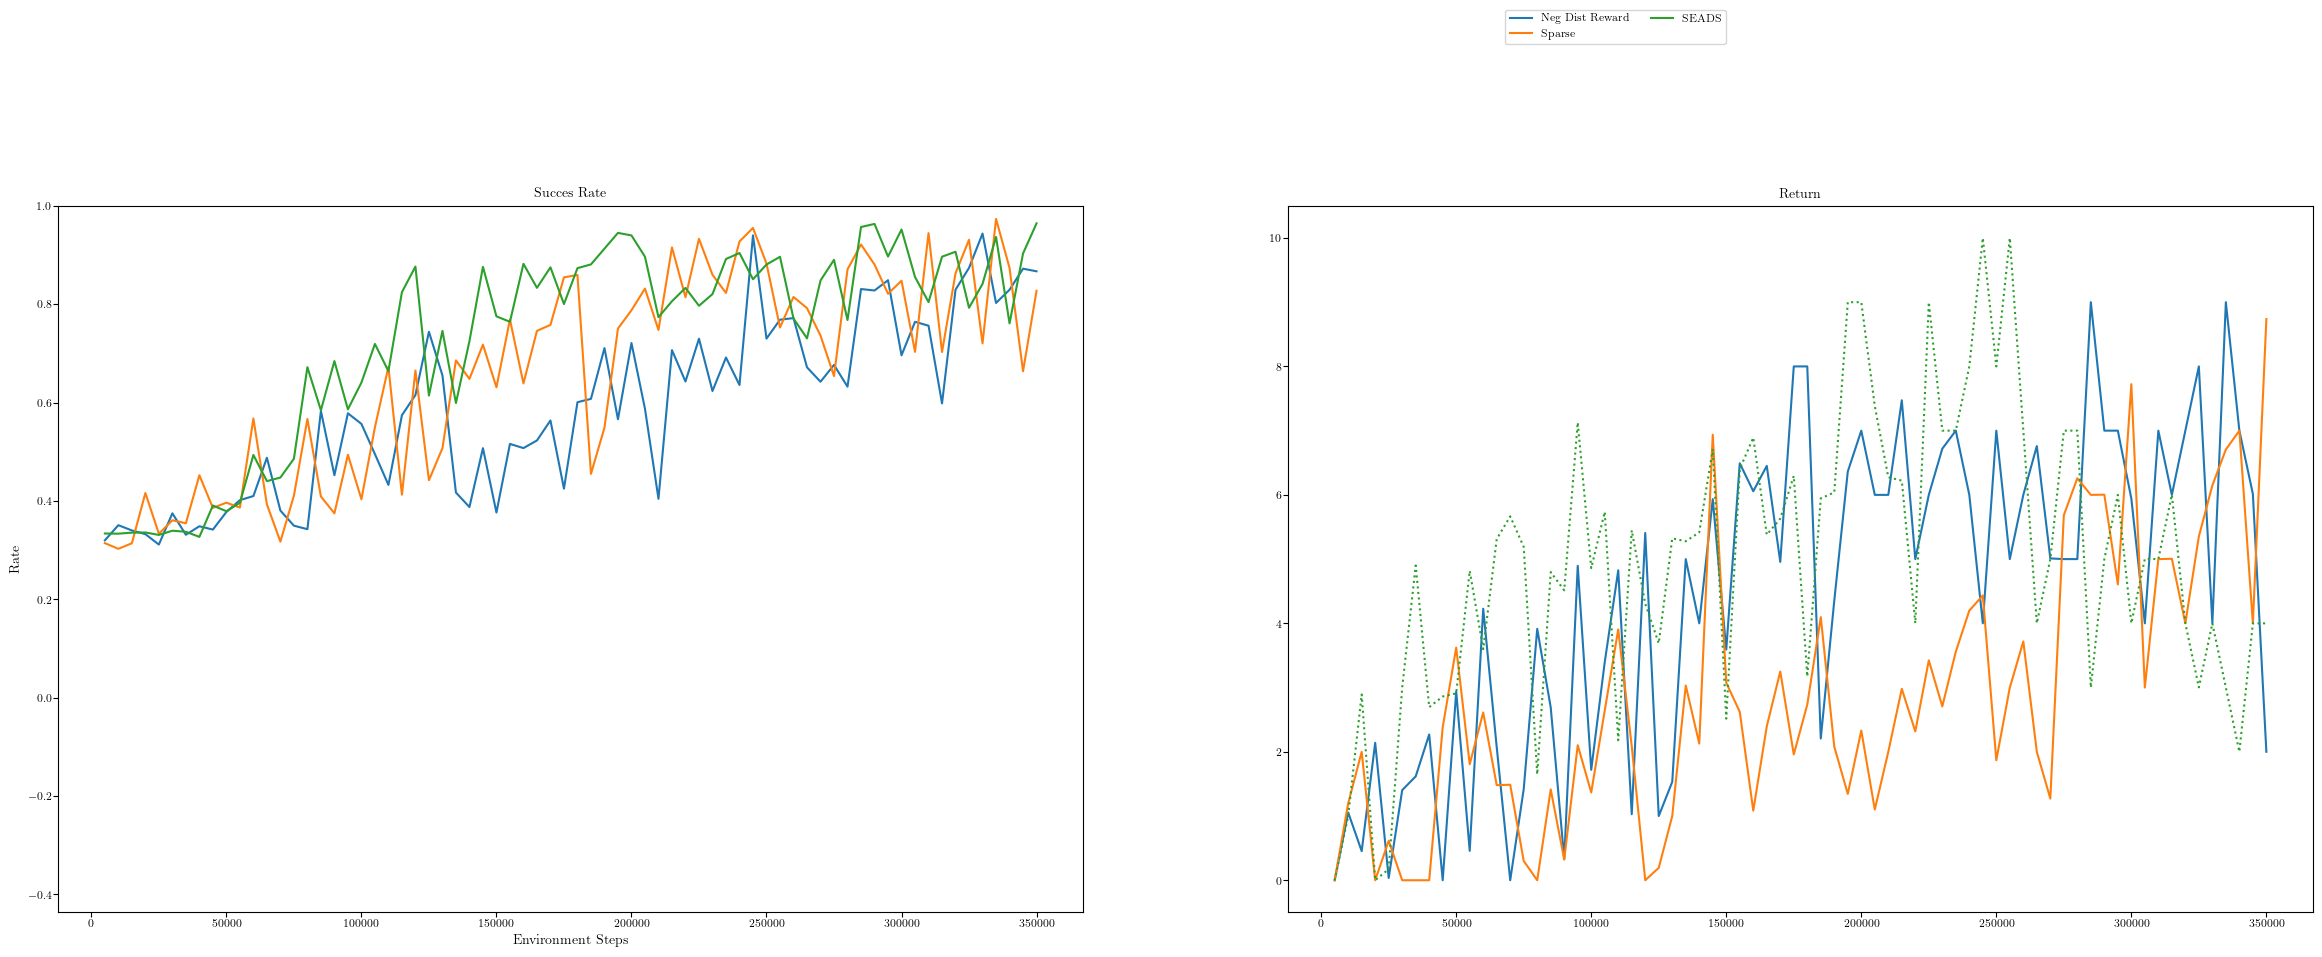

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(5*TEXTWIDTH +0.15, 5*(TEXTWIDTH + 0.15) * (5**.5 - 1) / (2*2)))

# 2x2 puzzle
# 2 skills
ax[0].plot(x, mean_succ_shaping_2x3, label="Neg Dist Reward")
ax[0].fill_between(x, mean_succ_shaping_2x3 + std_succ_shaping_2x3, mean_succ_shaping_2x3 - std_succ_shaping_2x3, alpha=0.3)

#ax[0].plot(x, mean_succ_prior_2x3, label="Neg Dist + Prior Buffer")
#ax[0].fill_between(x, mean_succ_prior_2x3 + std_succ_shaping_2x3, mean_succ_prior_2x3 - std_succ_prior_2x3, alpha=0.3)
#
#ax[0].plot(x, mean_succ_relabel_2x3, ':', label="Neg Dist + Relabeling")
#ax[0].fill_between(x, mean_succ_relabel_2x3 + std_succ_relabel_2x3, mean_succ_relabel_2x3 - std_succ_relabel_2x3, alpha=0.3)

ax[0].plot(x, mean_succ_sparse_2x3, label="Sparse")
ax[0].fill_between(x, mean_succ_sparse_2x3 + std_succ_sparse_2x3, mean_succ_sparse_2x3 - std_succ_sparse_2x3, alpha=0.3)

ax[0].plot(x, mean_succ_seads_2x3, label="SEADS")
ax[0].fill_between(x, mean_succ_seads_2x3 + std_succ_sparse_2x3, mean_succ_seads_2x3 - std_succ_seads_2x3, alpha=0.3)

#ax[0].plot(x, mean_succ_sparse_prior_2x3, label="Sparse + Prior Buffer")
#ax[0].fill_between(x, mean_succ_sparse_prior_2x3 + std_succ_sparse_prior_2x3, mean_succ_sparse_prior_2x3 - std_succ_sparse_prior_2x3, alpha=0.3)
#
#ax[0].plot(x, mean_succ_sparse_relabel_2x3, ':', label="Sparse + Relabeling")
#ax[0].fill_between(x, mean_succ_sparse_relabel_2x3 + std_succ_sparse_relabel_2x3, mean_succ_sparse_relabel_2x3 - std_succ_sparse_relabel_2x3, alpha=0.3)
#
ax[1].plot(x, mean_return_sparse_2x3, label="Sparse")
ax[1].fill_between(x, mean_return_sparse_2x3 + std_return_sparse_2x3, mean_return_sparse_2x3 - std_return_sparse_2x3, alpha=0.3)

ax[1].plot(x, mean_return_sparse_prior_2x3, label="Sparse + Prior Buffer")
ax[0].fill_between(x, mean_return_sparse_prior_2x3 + std_return_sparse_prior_2x3, mean_return_sparse_prior_2x3 - std_return_sparse_prior_2x3, alpha=0.3)

ax[1].plot(x, mean_return_sparse_relabel_2x3, ':', label="Sparse + Relabeling")
ax[1].fill_between(x, mean_return_sparse_relabel_2x3 + std_return_sparse_relabel_2x3, mean_return_sparse_relabel_2x3 - std_return_sparse_relabel_2x3, alpha=0.3)



ax[0].set_ylim(top=1.)
ax[0].set_title("Succes Rate")

ax[1].set_title("Return")

ax[0].set_xlabel('Environment Steps')
ax[0].set_ylabel('Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.7,1.1))
plt.savefig("Comparison-Reward_Shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

In [57]:
path_negdist_2x2_8skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

In [58]:
path_sparse_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed978623/evaluations.npz"]

# neg dist multiplied with 5
#path_negdist_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]


# 0.5 * neg dist
path_negdist_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

# 0.5 * neg dist
path_neg_move_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623/evaluations.npz"]

path_move_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623/evaluations.npz"]

In [68]:
path_sparse_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz"]

# 0.5 * negdist
path_negdist_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623//evaluations.npz"]

path_neg_move_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623//evaluations.npz"]

path_move_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623//evaluations.npz"]

#sparse_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined_2x2/2x3_3skills_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
#              "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined_2x2/2x3_3skills_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz"]

In [60]:
path_sparse_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed978623/evaluations.npz"]

path_negdist_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

path_neg_move_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementTrue_sparseFalse_seed978623/evaluations.npz"]

path_move_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementTrue_sparseFalse_seed978623/evaluations.npz"]

In [69]:
x1 = np.load(path_sparse_2x2_2skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x1 <= 155000)
x1 = x1[idx]

returns_sparse_2x2_2skills, succ_sparse_2x2_2skills = gather_data(path_sparse_2x2_2skills, x1, idx)
returns_negdist_2x2_2skills, succ_negdist_2x2_2skills = gather_data(path_negdist_2x2_2skills, x1, idx)
returns_neg_move_2x2_2skills, succ_neg_move_2x2_2skills = gather_data(path_neg_move_2x2_2skills, x1, idx)
returns_move_2x2_2skills, succ_move_2x2_2skills = gather_data(path_move_2x2_2skills, x1, idx)
#returns_negdist_2x2_8skills, succ_negdist_2x2_8skills = gather_data(path_negdist_2x2_8skills, x1, idx)

mean_succ_sparse_2x2_2skills, std_succ_sparse_2x2_2skills = compute_mean_std(succ_sparse_2x2_2skills)
mean_succ_negdist_2x2_2skills, std_succ_negdist_2x2_2skills = compute_mean_std(succ_negdist_2x2_2skills)
mean_succ_neg_move_2x2_2skills, std_succ_neg_move_2x2_2skills = compute_mean_std(succ_neg_move_2x2_2skills)
mean_succ_move_2x2_2skills, std_succ_move_2x2_2skills = compute_mean_std(succ_move_2x2_2skills)
#mean_succ_negdist_2x2_8skills, std_succ_negdist_2x2_8skills = compute_mean_std(succ_negdist_2x2_8skills)

In [71]:
x2 = np.load(path_sparse_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x2 <= 200000)
x2 = x2[idx]

x2_1 = np.load(path_neg_move_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx_2 = np.where(x2_1 <= 189000)
x2_1 = x2_1[idx_2]

x2_2 = np.load(path_sparse_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx_3 = np.where(x2_2 <= 800000)
x2_2 = x2_2[idx_3]

returns_sparse_2x3_3skills, succ_sparse_2x3_3skills = gather_data(path_sparse_2x3_3skills, x2, idx)
returns_negdist_2x3_3skills, succ_negdist_2x3_3skills = gather_data(path_negdist_2x3_3skills, x2, idx)
returns_neg_move_2x3_3skills, succ_neg_move_2x3_3skills = gather_data(path_neg_move_2x3_3skills, x2_1, idx_2)
returns_move_2x3_3skills, succ_move_2x3_3skills = gather_data(path_move_2x3_3skills, x2, idx)


#returns_sparse_2x3, succ_sparse_2x3 = gather_data(path_sparse_3skills_2x3, x2_2, idx_3)
#mean_succ_sparse_2x3, std_succ_sparse_2x3 = compute_mean_std(succ_sparse_2x3)

mean_succ_sparse_2x3_3skills, std_succ_sparse_2x3_3skills = compute_mean_std(succ_sparse_2x3_3skills)
mean_succ_negdist_2x3_3skills, std_succ_negdist_2x3_3skills = compute_mean_std(succ_negdist_2x3_3skills)
mean_succ_neg_move_2x3_3skills, std_succ_neg_move_2x3_3skills = compute_mean_std(succ_neg_move_2x3_3skills)
mean_succ_move_2x3_3skills, std_succ_move_2x3_3skills = compute_mean_std(succ_move_2x3_3skills)

In [72]:
x3 = np.load(path_sparse_3x3_4skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x3 <= 200000)
x3 = x3[idx]

returns_sparse_3x3_4skills, succ_sparse_3x3_4skills = gather_data(path_sparse_3x3_4skills, x3, idx)
returns_negdist_3x3_4skills, succ_negdist_3x3_4skills = gather_data(path_negdist_3x3_4skills, x3, idx)
returns_neg_move_3x3_4skills, succ_neg_move_3x3_4skills = gather_data(path_neg_move_3x3_4skills, x3, idx)
returns_move_3x3_4skills, succ_move_3x3_4skills = gather_data(path_move_3x3_4skills, x3, idx)

mean_succ_sparse_3x3_4skills, std_succ_sparse_3x3_4skills = compute_mean_std(succ_sparse_3x3_4skills)
mean_succ_negdist_3x3_4skills, std_succ_negdist_3x3_4skills = compute_mean_std(succ_negdist_3x3_4skills)
mean_succ_neg_move_3x3_4skills, std_succ_neg_move_3x3_4skills = compute_mean_std(succ_neg_move_3x3_4skills)
mean_succ_move_3x3_4skills, std_succ_move_3x3_4skills = compute_mean_std(succ_move_3x3_4skills)

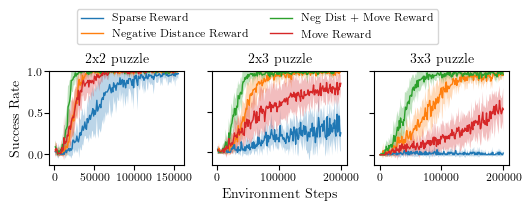

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1) / (2 * 3)))

# 2x2 puzzle
# 2 skills
ax[0].plot(x1, mean_succ_sparse_2x2_2skills, linewidth=1, label="Sparse Reward")
ax[0].fill_between(x1, mean_succ_sparse_2x2_2skills + std_succ_sparse_2x2_2skills, mean_succ_sparse_2x2_2skills - std_succ_sparse_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_negdist_2x2_2skills, linewidth=1, label="Negative Distance Reward")
ax[0].fill_between(x1, mean_succ_negdist_2x2_2skills + std_succ_negdist_2x2_2skills, mean_succ_negdist_2x2_2skills - std_succ_negdist_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_neg_move_2x2_2skills, linewidth=1, label="Negative Dist + Move Reward")
ax[0].fill_between(x1, mean_succ_neg_move_2x2_2skills + std_succ_neg_move_2x2_2skills, mean_succ_neg_move_2x2_2skills - std_succ_neg_move_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_move_2x2_2skills, linewidth=1, label="Move Reward")
ax[0].fill_between(x1, mean_succ_move_2x2_2skills + std_succ_move_2x2_2skills, mean_succ_move_2x2_2skills - std_succ_move_2x2_2skills, alpha=0.3)


# 8 skills
#ax[0].plot(x1, mean_succ_negdist_2x2_8skills, label="Negative Distance Reward 2x2 with 8 skills")
#ax[0].fill_between(x1, mean_succ_negdist_2x2_8skills + std_succ_negdist_2x2_8skills, mean_succ_negdist_2x2_8skills - std_succ_negdist_2x2_8skills, alpha=0.3)

# 2x3 puzzle
ax[1].plot(x2, mean_succ_sparse_2x3_3skills, linewidth=1, label="Sparse Reward")
ax[1].fill_between(x2, mean_succ_sparse_2x3_3skills + std_succ_sparse_2x3_3skills, mean_succ_sparse_2x3_3skills - std_succ_sparse_2x3_3skills, alpha=0.3)

#ax[1].plot(x2_2, mean_succ_sparse_2x3, label="Sparse Reward")
#ax[1].fill_between(x2_2, mean_succ_sparse_2x3 + std_succ_sparse_2x3, mean_succ_sparse_2x3 - std_succ_sparse_2x3, alpha=0.3)

ax[1].plot(x2, mean_succ_negdist_2x3_3skills, linewidth=1, label="Negative Distance Reward")
ax[1].fill_between(x2, mean_succ_negdist_2x3_3skills + std_succ_negdist_2x3_3skills, mean_succ_negdist_2x3_3skills - std_succ_negdist_2x3_3skills, alpha=0.3)

ax[1].plot(x2_1, mean_succ_neg_move_2x3_3skills, linewidth=1, label="Neg Dist + Move Reward")
ax[1].fill_between(x2_1, mean_succ_neg_move_2x3_3skills + std_succ_neg_move_2x3_3skills, mean_succ_neg_move_2x3_3skills - std_succ_neg_move_2x3_3skills, alpha=0.3)

ax[1].plot(x2, mean_succ_move_2x3_3skills, linewidth=1, label="Move Reward")
ax[1].fill_between(x2, mean_succ_move_2x3_3skills + std_succ_move_2x3_3skills, mean_succ_move_2x3_3skills - std_succ_move_2x3_3skills, alpha=0.3)

# 3x3 puzzle
ax[2].plot(x3, mean_succ_sparse_3x3_4skills, linewidth=1, label="Sparse Reward")
ax[2].fill_between(x3, mean_succ_sparse_3x3_4skills + std_succ_sparse_3x3_4skills, mean_succ_sparse_3x3_4skills - std_succ_sparse_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_negdist_3x3_4skills, linewidth=1, label="Negative Distance Reward")
ax[2].fill_between(x3, mean_succ_negdist_3x3_4skills + std_succ_negdist_3x3_4skills, mean_succ_negdist_3x3_4skills - std_succ_negdist_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_neg_move_3x3_4skills, linewidth=1, label="Neg Dist + Move Reward")
ax[2].fill_between(x3, mean_succ_neg_move_3x3_4skills + std_succ_neg_move_3x3_4skills, mean_succ_neg_move_3x3_4skills - std_succ_neg_move_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_move_3x3_4skills, linewidth=1, label="Move Reward")
ax[2].fill_between(x3, mean_succ_move_3x3_4skills + std_succ_move_3x3_4skills, mean_succ_move_3x3_4skills - std_succ_move_3x3_4skills, alpha=0.3)




ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)
ax[2].set_ylim(top=1.)
ax[0].set_title("2x2 puzzle")
ax[1].set_title("2x3 puzzle")
ax[2].set_title("3x3 puzzle")

ax[1].get_yaxis().set_ticklabels([])
ax[2].get_yaxis().set_ticklabels([])

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax[1].set_xlabel('Environment Steps')
ax[0].set_ylabel('Success Rate')
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.43))
plt.savefig("Comparison-Reward_Shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Puzzle Sizes**

In [143]:
path_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_3x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

In [144]:
x = np.load(path_3x3[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 2230000)
x = x[idx]

returns_1x2, succ_1x2 = gather_data(path_1x2, x, idx)
returns_2x2, succ_2x2 = gather_data(path_2x2, x, idx)
returns_2x3, succ_2x3 = gather_data(path_2x3, x, idx)
returns_3x3, succ_3x3 = gather_data(path_3x3, x, idx)

mean_succ_1x2, std_succ_1x2 = compute_mean_std(x, succ_1x2)
mean_succ_2x2, std_succ_2x2 = compute_mean_std(x, succ_2x2)
mean_succ_2x3, std_succ_2x3 = compute_mean_std(x, succ_2x3)
mean_succ_3x3, std_succ_3x3 = compute_mean_std(x, succ_3x3)

FileNotFoundError: [Errno 2] No such file or directory: '/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_1x2, label="1x2 Puzzle")
ax.fill_between(x, mean_succ_1x2 + std_succ_1x2, mean_succ_1x2 - std_succ_1x2, alpha=0.3)

ax.plot(x, mean_succ_2x2, label="2x2 Puzzle")
ax.fill_between(x, mean_succ_2x2 + std_succ_1x2, mean_succ_2x2 - std_succ_2x2, alpha=0.3)

ax.plot(x, mean_succ_2x3, label="2x3 Puzzle")
ax.fill_between(x, mean_succ_2x3 + std_succ_2x3, mean_succ_2x3 - std_succ_2x3, alpha=0.3)

ax.plot(x, mean_succ_3x3, label="3x3 Puzzle")
ax.fill_between(x, mean_succ_3x3 + std_succ_3x3, mean_succ_3x3 - std_succ_3x3, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Sparse and Neg Dist Reward")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Observation Spaces**

In [43]:
path_coor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

path_nocoor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

In [44]:
x = np.load(path_coor[0], mmap_mode='r')["timesteps"]
idx_coor = np.where(x <= 172000)
x_coor = x[idx_coor]

x = np.load(path_nocoor[0], mmap_mode='r')['timesteps']
idx_nocoor = np.where(x <= 182000)
x_nocoor = x[idx_nocoor]
print(x_nocoor[-1])

returns_coor, succ_coor = gather_data(path_coor, x_coor, idx_coor)
returns_nocoo, succ_nocoor = gather_data(path_nocoor, x_nocoor, idx_nocoor)

mean_succ_coor, std_succ_coor = compute_mean_std(succ_coor)
mean_succ_nocoor, std_succ_nocoor = compute_mean_std(succ_nocoor)

182000


KeyError: 'successes is not a file in the archive'

NameError: name 'mean_succ_coor' is not defined

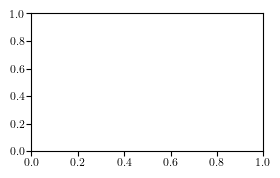

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(0.5 * TEXTWIDTH +0.1, 0.5 * TEXTWIDTH * (5**.5 - 1) / 2))

ax.plot(x_coor, mean_succ_coor, label="With Coordinates")
ax.fill_between(x_coor, mean_succ_coor + std_succ_coor, mean_succ_coor - std_succ_coor, alpha=0.3)

ax.plot(x_nocoor, mean_succ_nocoor, label="Without Coordinates")
ax.fill_between(x_nocoor, mean_succ_nocoor + std_succ_nocoor, mean_succ_nocoor - std_succ_nocoor, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-Obs-Space.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

## **Dict vs. flat Box**

In [41]:
path_flat_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]

path_dict_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]


In [42]:
x = np.load(path_flat_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 160000)
x = x[idx]

print(x)

returns_flat, succ_flat = gather_data(path_flat_2x2, x, idx)
returns_dict, succ_dict = gather_data(path_dict_2x2, x, idx)

print(returns_flat)

mean_succ_flat, std_succ_flat = compute_mean_std(succ_flat)
mean_succ_dict, std_succ_dict = compute_mean_std(succ_dict)

FileNotFoundError: [Errno 2] No such file or directory: '/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_flat, label="Flat")
ax.fill_between(x, mean_succ_flat + std_succ_flat, mean_succ_flat - std_succ_flat, alpha=0.3)

#ax.plot(x, mean_succ_dict, label="Dict")
#ax.fill_between(x, mean_succ_dict + std_succ_dict, mean_succ_dict - std_succ_dict, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of SAC Learning Algorithms**

In [65]:
path_stable_2DGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10/evaluations.npz"]

path_stable_2DGoal05 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-05action/evaluations.npz"]

path_stable_2DGoal_ri = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit/evaluations.npz"]

path_stable_2DGoal_ri025 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10-randominit-025action/evaluations.npz"]

path_tandon_2dGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal01-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal02-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal03-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal04-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal05-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal06-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal07-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal08-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal09-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal10-randominit-025action_50.npz"]


In [66]:
path_stable_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval01_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval02_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval03_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval04_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval05_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval06_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval07_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval08_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval09_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval10_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz"]

path_tandon_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval01_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval02_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval03_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval04_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval05_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval06_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval07_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval08_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval09_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval10_1500.npz"]

In [67]:
path_stable_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval01_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval02_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval03_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval04_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval05_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval06_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval07_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval08_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval09_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval10_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval01_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval02_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval03_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval04_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval05_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval06_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval07_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval08_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval09_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval10_2000.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval01_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval02_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval03_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval04_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval05_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval06_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval07_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval08_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval09_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval10_2000.npz"]

path_tandon_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval01_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval02_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval03_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval04_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval05_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval06_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval07_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval08_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval09_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval10_2000.npz"]

In [7]:
data_stable = np.load(path_stable_2x2[1], mmap_mode='r')
for k in data_stable.files:
    print(k, data_stable[k])
    
data_tandon = np.load(path_tandon_2x2[0], mmap_mode='r')
for k in data_tandon.files:
    print(k, data_tandon[k])

timesteps [  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000
  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000
  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000
  41000  42000  43000  44000  45000  46000  47000  48000  49000  50000
  51000  52000  53000  54000  55000  56000  57000  58000  59000  60000
  61000  62000  63000  64000  65000  66000  67000  68000  69000  70000
  71000  72000  73000  74000  75000  76000  77000  78000  79000  80000
  81000  82000  83000  84000  85000  86000  87000  88000  89000  90000
  91000  92000  93000  94000  95000  96000  97000  98000  99000 100000
 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000
 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000
 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000
 131000 132000 133000 134000 135000 136000 137000 138000 139000 140

In [22]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2DGoal, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2dGoal, x, idx)

returns_stable05, succ_stable05 = gather_data(path_stable_2DGoal05, x, idx)
returns_stable_ri, succ_stable_ri = gather_data(path_stable_2DGoal_ri, x, idx)
returns_stable_ri025, succ_stable_ri025 = gather_data(path_stable_2DGoal_ri025, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

mean_return_stable05, std_return_stable05 = compute_mean_std(returns_stable05)
mean_succ_stable05, std_succ_stable05 = compute_mean_std(succ_stable05)
mean_return_stable_ri, std_return_stable_ri = compute_mean_std(returns_stable_ri)
mean_succ_stable_ri, std_succ_stable_ri = compute_mean_std(succ_stable_ri)
mean_return_stable_ri025, std_return_stable_ri025 = compute_mean_std(returns_stable_ri025)
mean_succ_stable_ri025, std_succ_stable_ri025 = compute_mean_std(succ_stable_ri025)

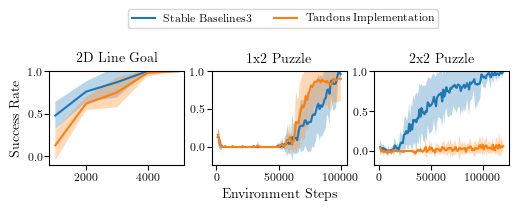

In [23]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1.) / (2*3)))
######################################################################################
# 2D Line Goal ###
##################
#ax[0, 0].set_ylim(top=100)
#ax[0, 0].plot(x, mean_return_stable_ri025, label="Stable Baselines3")
#ax[0, 0].fill_between(x, mean_return_stable_ri025 + std_return_stable_ri025, mean_return_stable_ri025 - std_return_stable_ri025, alpha=0.3)
#ax[0, 0].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 0].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 0].set_ylim(top=100)

ax[0].plot(x, mean_succ_stable_ri025, label="Stable Baselines3")
ax[0].fill_between(x, mean_succ_stable_ri025 + std_succ_stable_ri025, mean_succ_stable_ri025 - std_succ_stable_ri025, alpha=0.3)
ax[0].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[0].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[0].set_ylim(top=1.)
ax[0].set_title("2D Line Goal")

######################################################################################
# 1x2 puzzle #####
##################

x = np.load(path_stable_1x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 100000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_1x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_1x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 1].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 1].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 1].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 1].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 1].set_ylim(top=100)


ax[1].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[1].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[1].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[1].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[1].set_ylim(top=1.)
ax[1].set_title("1x2 Puzzle")

######################################################################################
# 2x2 puzzle #####
##################

x = np.load(path_stable_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 120000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 2].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 2].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 2].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 2].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 2].set_ylim(top=100)


ax[2].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[2].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[2].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[2].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[2].set_ylim(top=1.)
ax[2].set_title("2x2 Puzzle")

#ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
#ax[2].set_xticklabels([])

for i in range(3):
        ax[i].locator_params(axis='y', nbins=3)

ax[1].set_xlabel('Environment Steps')
#ax[0, 0].set_ylabel('Average Return')
ax[0].set_ylabel('Success Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.43))
plt.savefig("Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

Every 1000 environment steps, we evaluated for 10 episodes and averaged the returns and success rate over them. We did 10 runs like this. In bold, we can see the mean of those runs. The shaded areas visualize the standard deviation. During training, we terminated an episode on change of symbolic state. However, during evaluation we did not do so but ended every episode after 100 steps. This way we can see via the return how long the actor took to reach the goal state in an episode.

Difference in starting to see Increase in success for 1x2 and 2x2 puzzle -> Boarders are the same for both puzzles. Thus, in the bigger puzzle there is less free space. In the small puzzle there is much exploration in the beginning. Because, there is a lot of free space agent has many episodes of exploration, where it does not get any reward in training, such that it does not learn much in the beginning. We observed that for Tandons implementation the policy seems to converge quicker and explores the space less well, leading to the poor performance in the 2x2 puzzle.

# **Comparison of FM Implementzations**

In [6]:
simple_path = ["fm/fm_eval_empty_input_4skills_seed12345.npz", "fm/fm_eval_empty_input_24skills_seed12345.npz"]
symstate_path = ["fm/fm_eval_sym_input_4skills_seed12345.npz", "fm/fm_eval_sym_input_24skills_seed12345.npz"]
lookup_path = ["fm_eval/fm_eval_lookup_4.npz", "fm_eval/fm_eval_lookup_24.npz"]

In [7]:
data_simple_4skills = np.load(simple_path[0], mmap_mode='r')
data_simple_24skills = np.load(simple_path[1], mmap_mode='r')
for k in data_simple_4skills.files:
    print(k, data_simple_4skills[k])
    
data_sym_4skills = np.load(symstate_path[0], mmap_mode='r')
data_sym_24skills = np.load(symstate_path[1], mmap_mode='r')
for k in data_sym_4skills.files:
    print(k, data_sym_4skills[k])

data_lookup_4skills = np.load(lookup_path[0], mmap_mode='r')
data_lookup_24skills = np.load(lookup_path[1], mmap_mode='r')

train_loss [2.1749146  2.18660498 2.20363808 2.15695906 2.15156746 2.1709075
 2.09085751 2.09738588 2.21566772 2.07745123 2.10725117 2.03729224
 1.94048071 1.85870957 1.90947485 2.06289697 2.00462055 2.08532023
 1.95905042 1.98175216 1.83530235 1.97434819 1.93229198 1.75311053
 2.06597257 1.87008476 1.73970103 1.71883035 1.7609483  1.7828716
 1.59507847 1.7232703  1.75089347 1.78456092 1.42239332 1.47933269
 1.70598006 1.8903048  1.50373769 1.56591332 1.63656473 1.42426801
 1.9479624  1.77804446 1.21631205 1.26309741 1.38516247 1.66352701
 1.62913203 1.12613201 1.1477766  1.28686857 1.3684504  1.30011678
 0.98755729 1.10323071 1.06006098 1.00345135 1.43636048 1.2748574
 1.61326981 0.85450709 1.3048017  0.69752955 0.89346629 1.01346076
 0.66675931 0.95301616 0.69121492 0.76986408 0.63263637 1.07975709
 1.22175789 0.64350653 0.85463035 0.70591855 0.94490623 0.57603991
 0.96028996 0.62768686 0.55555445 0.91362071 0.50426757 0.50658613
 0.73603678 0.76244235 0.77027941 0.72912604 0.3839519

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

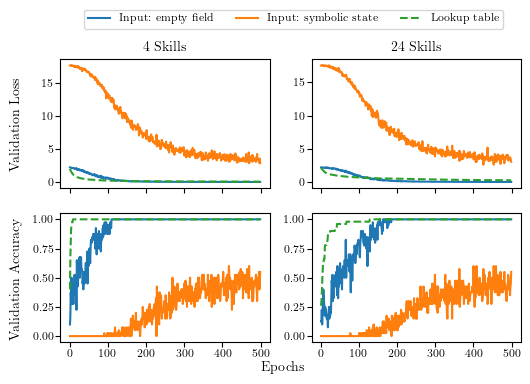

In [8]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1.) / (2)))

ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_simple_4skills["test_loss"], label="Input: empty field")
ax[0, 0].plot(np.arange(data_sym_4skills["test_loss"].shape[0]), data_sym_4skills["test_loss"], label="Input: symbolic state")
#ax[0, 0].plot(np.arange(data_lookup_4skills["test_loss"].shape[0]), data_lookup_4skills["test_loss"], "--", label="Lookup table")

ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_simple_4skills["test_acc"], label="Input: empty field")
ax[1, 0].plot(np.arange(data_sym_4skills["test_acc"].shape[0]), data_sym_4skills["test_acc"], label="Input: symbolic state")
ax[1, 0].plot(np.arange(data_lookup_4skills["test_acc"].shape[0]), data_lookup_4skills["test_acc"], "--", label="Lookup table")
ax[0, 0].set_title("Multiple skill effects")

print(np.arange(data_sym_24skills["test_loss"].shape[0]))
ax[0, 1].plot(np.arange(data_simple_24skills["test_loss"].shape[0]), data_simple_24skills["test_loss"], label="Input:empty field")
ax[0, 1].plot(np.arange(data_sym_24skills["test_loss"].shape[0]), data_sym_24skills["test_loss"], label="Input: symbolic state")
ax[0, 1].plot(np.arange(data_lookup_24skills["test_loss"].shape[0]), data_lookup_24skills["test_loss"], "--", label="Lookup table")

ax[1, 1].plot(np.arange(data_simple_24skills["test_acc"].shape[0]), data_simple_24skills["test_acc"], label="Input: empty field")
ax[1, 1].plot(np.arange(data_sym_24skills["test_acc"].shape[0]), data_sym_24skills["test_acc"], label="Input: symbolic state")
ax[1, 1].plot(np.arange(data_lookup_24skills["test_acc"].shape[0]), data_lookup_24skills["test_acc"], "--", label="Lookup table")
ax[0, 1].set_title("Single skill effect")

fig.text(0.5, 0.03, 'Epochs', ha='center')
fig.text(0.04, 0.28, 'Validation Accuracy', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Validation Loss', va='center', rotation='vertical')

ax[0, 0].set_title("4 Skills")
ax[0, 1].set_title("24 Skills")

handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.88,1.03))
plt.savefig("Fm_Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)
plt.show()


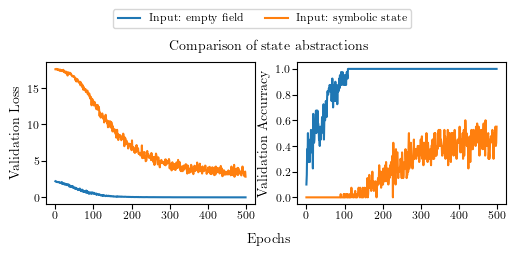

In [30]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(TEXTWIDTH +0.15, (TEXTWIDTH + 0.15) * (5**.5 - 1.) /4))

ax[0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_simple_4skills["test_loss"], label="Input: empty field")
ax[0].plot(np.arange(data_sym_4skills["test_loss"].shape[0]), data_sym_4skills["test_loss"], label="Input: symbolic state")

ax[1].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_simple_4skills["test_acc"], label="Input: empty field")
ax[1].plot(np.arange(data_sym_4skills["test_acc"].shape[0]), data_sym_4skills["test_acc"], label="Input: symbolic state")
fig.text(0.5, 0.95, 'Comparison of state abstractions', ha='center')

fig.text(0.5, -0.1, 'Epochs', ha='center')

ax[0].set_ylabel("Validation Loss")
ax[1].set_ylabel("Validation Accurracy")


handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.75,1.2))
plt.savefig("Fm_Comparison_4skills.svg",
            bbox_inches='tight', dpi=plt.gcf().dpi)
plt.show()


# **Relabeling**

In [101]:
path_2x3_relabel = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3_num_skills3_sparseTrue_relabelingTrue/evaluations.npz"]

path_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/parallel2x3_num_skills3_sparseTrue_relabelingFalse/evaluations.npz"]

In [108]:
x = np.load(path_2x3_relabel[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 490000)
x = x[idx]

returns_relabel, succ_relabel = gather_data(path_2x3_relabel, x, idx)
returns, succ = gather_data(path_2x3, x, idx)

mean_succ_relabel, std_succ_relabel = compute_mean_std(succ_relabel)
mean_succ, std_succ = compute_mean_std(succ)

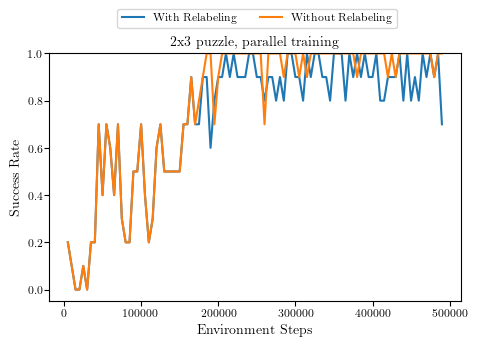

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(0.9 * TEXTWIDTH +0.1, 0.9 * TEXTWIDTH * (5**.5 - 1) / 2))

ax.plot(x, mean_succ_relabel, label="With Relabeling")
ax.fill_between(x, mean_succ_relabel + std_succ_relabel, mean_succ_relabel - std_succ_relabel, alpha=0.3)

ax.plot(x, mean_succ, label="Without Relabeling")
ax.fill_between(x, mean_succ + std_succ, mean_succ - std_succ, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("2x3 puzzle, parallel training")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
#plt.savefig(".pdf",
#            bbox_inches='tight', dpi=plt.gcf().dpi)#,
#            #dpi=1000)
plt.show()